In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sb
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm


In [2]:
cars = pd.read_csv('C://Users//umutd//Desktop/gereksiz//duzenlenmis.csv')
print("Dimension of our data set is: ")
print(cars.shape)
cars.head(50)

Dimension of our data set is: 
(971, 23)


,ilan No,Marka,Seri,Yıl,KM,Yakıt,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Çekiş,...,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz_km/h,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL
0,873720347,Renault,Clio,2020,8000,Benzin,Manuel,101,1301,Önden Çekiş,...,NaN,NaN,NaN,NaN,NaN,NaN,Evet,Hayır,İkinci El,144000
1,873331197,Honda,Civic,2020,7850,Benzin & LPG,Yarı Otomatik,101,1301,Önden Çekiş,...,NaN,NaN,NaN,NaN,NaN,NaN,Evet,Hayır,İkinci El,268500
2,876006641,Toyota,Corolla,2015,260000,Dizel,Manuel,90,1364,Önden Çekiş,...,1465.0,4620.0,5.0,205.0,180.0,12.5,Evet,Evet,İkinci El,137000
3,875785619,Ford,Focus,2010,252000,Dizel,Manuel,110,1560,Önden Çekiş,...,1500.0,4337.0,5.0,240.0,190.0,11.1,Hayır,Evet,İkinci El,118000
4,862667303,Skoda,Octavia,2013,87000,Dizel,Yarı Otomatik,105,1598,Önden Çekiş,...,1461.0,4659.0,5.0,250.0,194.0,10.9,Hayır,Hayır,İkinci El,195000
5,860504773,Audi,A6,2016,55000,Dizel,Yarı Otomatik,190,1968,Önden Çekiş,...,1455.0,4933.0,5.0,400.0,232.0,8.2,Hayır,Evet,İkinci El,642900
6,875987371,Renault,Symbol,2013,242000,Benzin,Manuel,75,1149,Önden Çekiş,...,1517.0,4348.0,5.0,107.0,156.0,14.5,Hayır,Evet,İkinci El,77000
7,868661141,Volkswagen,Jetta,2016,50000,Benzin,Yarı Otomatik,150,1395,Önden Çekiş,...,1482.0,4659.0,5.0,250.0,220.0,8.6,Hayır,Evet,İkinci El,180000
8,876780241,BMW,3 Serisi,2015,90000,Benzin,Yarı Otomatik,170,1598,Arkadan İtiş,...,1429.0,4633.0,5.0,250.0,230.0,7.6,Hayır,Evet,İkinci El,384000
9,875660632,Renault,Megane,2008,239000,Dizel,Manuel,80,1461,Önden Çekiş,...,1460.0,4498.0,5.0,185.0,171.0,14.5,Evet,Evet,İkinci El,80000


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ilan No         971 non-null    int64  
 1   Marka           971 non-null    object 
 2   Seri            971 non-null    object 
 3   Yıl             971 non-null    int64  
 4   KM              971 non-null    int64  
 5   Yakıt           971 non-null    object 
 6   Vites           945 non-null    object 
 7   Motor_Gucu_hp   971 non-null    int64  
 8   Motor_Hacmi_cc  971 non-null    int64  
 9   Çekiş           971 non-null    object 
 10  Agirlik_kg      909 non-null    float64
 11  Bagaj_Kap_lt    910 non-null    float64
 12  Genislik_mm     908 non-null    float64
 13  Yukseklik_mm    908 non-null    float64
 14  Uzunluk_mm      908 non-null    float64
 15  Koltuk_Sayisi   919 non-null    float64
 16  Tork_nm         910 non-null    float64
 17  Max_hiz_km/h    907 non-null    flo

DATA PREPROCESSING

In [4]:
details = pd.DataFrame(cars, columns =['ilan No', 'Marka','Seri', 'Model','Yıl','KM','Yakit','Vites',
'Motor_Gucu_hp','Motor_Hacmi_cc','Çekiş','Agirlik_kg','Bagaj_Kap_lt','Genislik_mm'
,'Yukseklik_mm','Uzunluk_mm','Koltuk_Sayisi','Tork_nm','Max_hiz_km/h',
'Hizlanma_0_100','Garanti','Takas','Durumu','Fiyat_TL']) 

In [5]:
details.isnull().sum()

ilan No             0
Marka               0
Seri                0
Model             971
Yıl                 0
KM                  0
Yakit             971
Vites              26
Motor_Gucu_hp       0
Motor_Hacmi_cc      0
Çekiş               0
Agirlik_kg         62
Bagaj_Kap_lt       61
Genislik_mm        63
Yukseklik_mm       63
Uzunluk_mm         63
Koltuk_Sayisi      52
Tork_nm            61
Max_hiz_km/h       64
Hizlanma_0_100     66
Garanti             0
Takas               0
Durumu              0
Fiyat_TL            0
dtype: int64

I need to clear NaN values.We are going to replace NaN values with average of column.But I can do it for only numeric values.

In [6]:
mean_Agirlik=cars['Agirlik_kg'].mean()

In [7]:
cars['Agirlik_kg'].fillna(value=cars['Agirlik_kg'].mean(),inplace=True)

In [8]:
mean_Bagaj_Kap_lt=cars['Bagaj_Kap_lt'].mean()

In [9]:
cars['Bagaj_Kap_lt'].fillna(value=cars['Bagaj_Kap_lt'].mean(),inplace=True)

In [10]:
mean_Genislik_mm=cars['Genislik_mm'].mean()

In [11]:
cars['Genislik_mm'].fillna(value=cars['Genislik_mm'].mean(),inplace=True)

In [12]:
mean_Yukseklik_mm=cars['Yukseklik_mm'].mean()

In [13]:
cars['Yukseklik_mm'].fillna(value=cars['Yukseklik_mm'].mean(),inplace=True)

In [14]:
mean_Uzunluk_mm=cars['Uzunluk_mm'].mean()

In [15]:
cars['Uzunluk_mm'].fillna(value=cars['Uzunluk_mm'].mean(),inplace=True)

In [16]:
mean_Koltuk_Sayisi=cars['Koltuk_Sayisi'].mean()

In [17]:
cars['Koltuk_Sayisi'].fillna(value=cars['Koltuk_Sayisi'].mean(),inplace=True)

In [18]:
cars['Tork_nm'].fillna(value=cars['Tork_nm'].mean(),inplace=True)

In [19]:
cars= cars.rename(columns={'Max_hiz_km/h': 'Max_hiz'})

In [20]:
mean_Max_hiz=cars['Max_hiz'].mean()

In [21]:
cars['Max_hiz'].fillna(value=cars['Max_hiz'].mean(),inplace=True)

In [22]:
cars['Hizlanma_0_100'].fillna(value=cars['Hizlanma_0_100'].mean(),inplace=True)

In [23]:
details = pd.DataFrame(cars, columns =['ilan No', 'Marka','Seri', 'Model','Yıl','KM','Yakıt','Vites',
'Motor_Gucu_hp','Motor_Hacmi_cc','Çekiş','Agirlik_kg','Bagaj_Kap_lt','Genislik_mm'
,'Yukseklik_mm','Uzunluk_mm','Koltuk_Sayisi','Tork_nm','Max_hiz',
'Hizlanma_0_100','Garanti','Takas','Durumu','Fiyat_TL']) 

In [24]:
details.isnull().sum()

ilan No             0
Marka               0
Seri                0
Model             971
Yıl                 0
KM                  0
Yakıt               0
Vites              26
Motor_Gucu_hp       0
Motor_Hacmi_cc      0
Çekiş               0
Agirlik_kg          0
Bagaj_Kap_lt        0
Genislik_mm         0
Yukseklik_mm        0
Uzunluk_mm          0
Koltuk_Sayisi       0
Tork_nm             0
Max_hiz             0
Hizlanma_0_100      0
Garanti             0
Takas               0
Durumu              0
Fiyat_TL            0
dtype: int64

I am filling NaN values in 'Vites' column according to a condition.

In [25]:
cars

,ilan No,Marka,Seri,Yıl,KM,Yakıt,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Çekiş,...,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL
0,873720347,Renault,Clio,2020,8000,Benzin,Manuel,101,1301,Önden Çekiş,...,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,Evet,Hayır,İkinci El,144000
1,873331197,Honda,Civic,2020,7850,Benzin & LPG,Yarı Otomatik,101,1301,Önden Çekiş,...,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,Evet,Hayır,İkinci El,268500
2,876006641,Toyota,Corolla,2015,260000,Dizel,Manuel,90,1364,Önden Çekiş,...,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,Evet,Evet,İkinci El,137000
3,875785619,Ford,Focus,2010,252000,Dizel,Manuel,110,1560,Önden Çekiş,...,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,Hayır,Evet,İkinci El,118000
4,862667303,Skoda,Octavia,2013,87000,Dizel,Yarı Otomatik,105,1598,Önden Çekiş,...,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,Hayır,Hayır,İkinci El,195000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,Opel,Insignia,2016,95000,Dizel,Otomatik,136,1598,Önden Çekiş,...,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,Evet,Evet,İkinci El,225750
967,872696372,Hyundai,i30,2015,21000,Dizel,Yarı Otomatik,136,1582,Önden Çekiş,...,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,Hayır,Evet,İkinci El,229000
968,875534471,Peugeot,301,2018,99750,Dizel,Manuel,100,1560,Önden Çekiş,...,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,Evet,Evet,İkinci El,126500
969,876508395,Volkswagen,Polo,2016,44000,Dizel,Yarı Otomatik,90,1422,Önden Çekiş,...,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,Hayır,Evet,İkinci El,173000


In [26]:
conditions = [cars['Yıl'] < 2010, cars['Yıl'].between(2010,2015), cars['Yıl'] > 2015]
values = ['Yarı Otomatik', 'Otomatik', 'Manuel']

In [27]:
cars['Vites']=np.where(cars['Vites'].isnull(),
                      np.select(conditions,values),
                      cars['Vites'])

In [28]:
cars

,ilan No,Marka,Seri,Yıl,KM,Yakıt,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Çekiş,...,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL
0,873720347,Renault,Clio,2020,8000,Benzin,Manuel,101,1301,Önden Çekiş,...,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,Evet,Hayır,İkinci El,144000
1,873331197,Honda,Civic,2020,7850,Benzin & LPG,Yarı Otomatik,101,1301,Önden Çekiş,...,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,Evet,Hayır,İkinci El,268500
2,876006641,Toyota,Corolla,2015,260000,Dizel,Manuel,90,1364,Önden Çekiş,...,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,Evet,Evet,İkinci El,137000
3,875785619,Ford,Focus,2010,252000,Dizel,Manuel,110,1560,Önden Çekiş,...,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,Hayır,Evet,İkinci El,118000
4,862667303,Skoda,Octavia,2013,87000,Dizel,Yarı Otomatik,105,1598,Önden Çekiş,...,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,Hayır,Hayır,İkinci El,195000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,Opel,Insignia,2016,95000,Dizel,Otomatik,136,1598,Önden Çekiş,...,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,Evet,Evet,İkinci El,225750
967,872696372,Hyundai,i30,2015,21000,Dizel,Yarı Otomatik,136,1582,Önden Çekiş,...,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,Hayır,Evet,İkinci El,229000
968,875534471,Peugeot,301,2018,99750,Dizel,Manuel,100,1560,Önden Çekiş,...,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,Evet,Evet,İkinci El,126500
969,876508395,Volkswagen,Polo,2016,44000,Dizel,Yarı Otomatik,90,1422,Önden Çekiş,...,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,Hayır,Evet,İkinci El,173000


In [29]:
cars.isnull().sum()

ilan No           0
Marka             0
Seri              0
Yıl               0
KM                0
Yakıt             0
Vites             0
Motor_Gucu_hp     0
Motor_Hacmi_cc    0
Çekiş             0
Agirlik_kg        0
Bagaj_Kap_lt      0
Genislik_mm       0
Yukseklik_mm      0
Uzunluk_mm        0
Koltuk_Sayisi     0
Tork_nm           0
Max_hiz           0
Hizlanma_0_100    0
Garanti           0
Takas             0
Durumu            0
Fiyat_TL          0
dtype: int64

There is no null value anymore .Now I must check if there are text is written wrong in categorical variables

In [30]:
cars.Marka.unique()

array(['Renault', 'Honda', 'Toyota', 'Ford', 'Skoda', 'Audi',
       'Volkswagen', 'BMW', 'Mercedes  Benz', 'Porsche', 'Citroën',
       'Fiat', 'Mini', 'Opel', 'Seat', 'Peugeot', 'Hyundai', 'Chevrolet',
       'Dacia', 'Kia', 'Chrysler', 'Mitsubishi', 'Volvo', 'Mazda',
       'Nissan', 'Tofaş', 'Dodge'], dtype=object)

In [31]:
cars.Seri.unique()

array(['Clio', 'Civic', 'Corolla', 'Focus', 'Octavia', 'A6', 'Symbol',
       'Jetta', '3 Serisi', 'Megane', 'Fluence', 'CLA', 'Panamera',
       'E Serisi', 'Passat Variant', 'A3', 'Golf', '4 Serisi', 'Arteon',
       'CElysée', 'Egea', 'Passat', '5 Serisi', 'Cooper', 'VW CC 1.4 TSI',
       'Corsa', 'Astra', 'Ibiza', 'SLK', '301', 'i30', '1 Serisi',
       'Insignia', 'Leon', 'Jazz', 'Aveo', 'Linea', 'A5', 'C5',
       'Ibiza 1.0 EcoTSI', 'A7', 'Logan', 'Accent Blue', 'C Serisi',
       'Punto', 'Polo', 'Fiesta', 'A Serisi', 'Lodgy',
       '5 Serisi 530i xDrive', 'A4', 'Beetle', '260', 'VW CC 2.0 TDI',
       'Rio', 'Lacetti', 'i20', 'Vectra', 'C3 1.2 PureTech', 'Auris',
       'Superb', '300 C', 'Colt', 'Toledo', 'M Serisi', 'Elantra',
       'E Serisi E 200 d', 'S90', 'Albea', 'S Serisi', 'BMax',
       'Toledo 1.4 TDI', '911', '307', '3', '206', 'Beetle 1.4 TSI',
       'Talisman', '500 Ailesi', 'Ceed', 'S60 1.5 T3', 'Sandero', 'Micra',
       'Latitude', '308', 'Grand CMax', 'CL

There are same seri name but it is written differend like '5 serisi 530 xDrive','VW CC 1.4 TSI' . Now I try to give them same name.VW CC 1.4 TSI = CC   and   5 serisi 530 xDrive = '5 Serisi'    in fact  

In [32]:
cars = cars.replace(to_replace ="5 Serisi 530i xDrive", value ="5 Serisi") 
cars = cars.replace(to_replace ="VW CC 2.0 TDI", value ="CC") 
cars = cars.replace(to_replace ="E Serisi E 200 d", value ="E Serisi")
cars = cars.replace(to_replace ="3", value ="3 Serisi")
cars = cars.replace(to_replace ="Beetle 1.4 TSI", value ="Bettle")
cars = cars.replace(to_replace ="S60 1.5 T3", value ="S60")
cars = cars.replace(to_replace ="Civic 1.6i DTEC", value ="Civic")
cars = cars.replace(to_replace ="V90 Cross Country 2.0 D D5", value ="V90")
cars = cars.replace(to_replace ="208 1.2 PureTech", value ="208")
cars = cars.replace(to_replace ="VW CC 1.4 TSI", value ="CC")
cars = cars.replace(to_replace ="Ibiza 1.0 EcoTSI", value ="Ibiza")
cars = cars.replace(to_replace ="V40 1.5 T3", value ="V40")
cars = cars.replace(to_replace ="206 +", value ="206")
cars = cars.replace(to_replace ="Toledo 1.4 TDI", value ="Toledo")
cars = cars.replace(to_replace ="C3 1.2 PureTech", value ="C3")

In [33]:
cars.Seri.unique()

array(['Clio', 'Civic', 'Corolla', 'Focus', 'Octavia', 'A6', 'Symbol',
       'Jetta', '3 Serisi', 'Megane', 'Fluence', 'CLA', 'Panamera',
       'E Serisi', 'Passat Variant', 'A3', 'Golf', '4 Serisi', 'Arteon',
       'CElysée', 'Egea', 'Passat', '5 Serisi', 'Cooper', 'CC', 'Corsa',
       'Astra', 'Ibiza', 'SLK', '301', 'i30', '1 Serisi', 'Insignia',
       'Leon', 'Jazz', 'Aveo', 'Linea', 'A5', 'C5', 'A7', 'Logan',
       'Accent Blue', 'C Serisi', 'Punto', 'Polo', 'Fiesta', 'A Serisi',
       'Lodgy', 'A4', 'Beetle', '260', 'Rio', 'Lacetti', 'i20', 'Vectra',
       'C3', 'Auris', 'Superb', '300 C', 'Colt', 'Toledo', 'M Serisi',
       'Elantra', 'S90', 'Albea', 'S Serisi', 'BMax', '911', '307', '206',
       'Bettle', 'Talisman', '500 Ailesi', 'Ceed', 'S60', 'Sandero',
       'Micra', 'Latitude', '308', 'Grand CMax', 'CLS', '207', '508',
       'Scenic', '7 Serisi', 'Cerato', 'V90', 'Scirocco', '200', 'Şahin',
       '208', 'Mondeo', '2 Serisi', 'TT', 'Rapid', 'Escort', 'V40',
    

I need to convert categoric values to numeric values to machine learning algorithms work with them

I will keep my original 'cars' data set.Because I will change categorical values.If I experience any problem I will back to origanal 'cars' data set again.

In [34]:
car=cars.copy()

In [35]:
car['Marka']=car['Marka']+' '+car['Seri']

In [36]:
del car['Seri']

In [37]:
pd.set_option('display.max_columns', None)

In [38]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [39]:
car

,ilan No,Marka,Yıl,KM,Yakıt,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Çekiş,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL
0,873720347,Renault Clio,2020,8000,Benzin,Manuel,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,Evet,Hayır,İkinci El,144000
1,873331197,Honda Civic,2020,7850,Benzin & LPG,Yarı Otomatik,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,Evet,Hayır,İkinci El,268500
2,876006641,Toyota Corolla,2015,260000,Dizel,Manuel,90,1364,Önden Çekiş,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,Evet,Evet,İkinci El,137000
3,875785619,Ford Focus,2010,252000,Dizel,Manuel,110,1560,Önden Çekiş,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,Hayır,Evet,İkinci El,118000
4,862667303,Skoda Octavia,2013,87000,Dizel,Yarı Otomatik,105,1598,Önden Çekiş,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,Hayır,Hayır,İkinci El,195000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,Opel Insignia,2016,95000,Dizel,Otomatik,136,1598,Önden Çekiş,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,Evet,Evet,İkinci El,225750
967,872696372,Hyundai i30,2015,21000,Dizel,Yarı Otomatik,136,1582,Önden Çekiş,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,Hayır,Evet,İkinci El,229000
968,875534471,Peugeot 301,2018,99750,Dizel,Manuel,100,1560,Önden Çekiş,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,Evet,Evet,İkinci El,126500
969,876508395,Volkswagen Polo,2016,44000,Dizel,Yarı Otomatik,90,1422,Önden Çekiş,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,Hayır,Evet,İkinci El,173000


In [40]:
car['Garanti'] = car['Garanti'].map({'Evet': 1, 'Hayır': 0})

car['Takas']=car['Takas'].map({'Evet':1,'Hayır':0})

car['Durumu']=car['Durumu'].map({'İkinci El':1,'Sıfır':0})

In [41]:
car

,ilan No,Marka,Yıl,KM,Yakıt,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Çekiş,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL
0,873720347,Renault Clio,2020,8000,Benzin,Manuel,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000
1,873331197,Honda Civic,2020,7850,Benzin & LPG,Yarı Otomatik,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500
2,876006641,Toyota Corolla,2015,260000,Dizel,Manuel,90,1364,Önden Çekiş,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000
3,875785619,Ford Focus,2010,252000,Dizel,Manuel,110,1560,Önden Çekiş,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000
4,862667303,Skoda Octavia,2013,87000,Dizel,Yarı Otomatik,105,1598,Önden Çekiş,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,Opel Insignia,2016,95000,Dizel,Otomatik,136,1598,Önden Çekiş,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750
967,872696372,Hyundai i30,2015,21000,Dizel,Yarı Otomatik,136,1582,Önden Çekiş,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000
968,875534471,Peugeot 301,2018,99750,Dizel,Manuel,100,1560,Önden Çekiş,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500
969,876508395,Volkswagen Polo,2016,44000,Dizel,Yarı Otomatik,90,1422,Önden Çekiş,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000


In [42]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
car["marka_code"] = lb_make.fit_transform(car["Marka"])


In [43]:
car.head(50)

,ilan No,Marka,Yıl,KM,Yakıt,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Çekiş,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code
0,873720347,Renault Clio,2020,8000,Benzin,Manuel,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80
1,873331197,Honda Civic,2020,7850,Benzin & LPG,Yarı Otomatik,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38
2,876006641,Toyota Corolla,2015,260000,Dizel,Manuel,90,1364,Önden Çekiş,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98
3,875785619,Ford Focus,2010,252000,Dizel,Manuel,110,1560,Önden Çekiş,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34
4,862667303,Skoda Octavia,2013,87000,Dizel,Yarı Otomatik,105,1598,Önden Çekiş,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91
5,860504773,Audi A6,2016,55000,Dizel,Yarı Otomatik,190,1968,Önden Çekiş,1660.000000,530.000000,1874.000000,1455.000000,4933.000000,5.000000,400.000000,232.000000,8.200000,0,1,1,642900,3
6,875987371,Renault Symbol,2013,242000,Benzin,Manuel,75,1149,Önden Çekiş,974.000000,510.000000,1733.000000,1517.000000,4348.000000,5.000000,107.000000,156.000000,14.500000,0,1,1,77000,86
7,868661141,Volkswagen Jetta,2016,50000,Benzin,Yarı Otomatik,150,1395,Önden Çekiş,1289.000000,510.000000,1778.000000,1482.000000,4659.000000,5.000000,250.000000,220.000000,8.600000,0,1,1,180000,105
8,876780241,BMW 3 Serisi,2015,90000,Benzin,Yarı Otomatik,170,1598,Arkadan İtiş,1390.000000,480.000000,1811.000000,1429.000000,4633.000000,5.000000,250.000000,230.000000,7.600000,0,1,1,384000,9
9,875660632,Renault Megane,2008,239000,Dizel,Manuel,80,1461,Önden Çekiş,1170.000000,520.000000,1777.000000,1460.000000,4498.000000,5.000000,185.000000,171.000000,14.500000,1,1,1,80000,84


In [44]:
car.marka_code.unique()

array([ 80,  38,  98,  34,  91,   3,  86, 105,   9,  84,  81,  55,  78,
        57, 107,   0, 104,  10, 100,  21,  28, 106,  11,  61, 103,  66,
        65,  88,  60,  72,  44,   7,  67,  89,  39,  16,  29,   2,  20,
         4,  23,  40,  54,  30, 108,  33,  52,  22,   1, 101,  51,  48,
        17,  43,  68,  19,  96,  94,  18,  62,  90,  14,  42, 111,  27,
         5,  31,  76,  73,  49,  69, 102,  87,  26,  45, 110,  24,  63,
        83,  74,  35,  56,  70,  75,  58,  85,  13,  46, 113, 109,  50,
        95,  71,  36,   8,   6,  92,  32, 112,  47,  25,  79,  93,  15,
        97,  12,  64,  53,  37,  41,  82,  59,  99,  77])

In [45]:
car.Marka.nunique()

114

In [46]:
car.marka_code.nunique()

114

In [47]:
pd.get_dummies(car,columns=["Yakıt"])

,ilan No,Marka,Yıl,KM,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Çekiş,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,Renault Clio,2020,8000,Manuel,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,1,0,0,0,0
1,873331197,Honda Civic,2020,7850,Yarı Otomatik,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,1,0,0,0
2,876006641,Toyota Corolla,2015,260000,Manuel,90,1364,Önden Çekiş,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,0,0
3,875785619,Ford Focus,2010,252000,Manuel,110,1560,Önden Çekiş,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,0,0
4,862667303,Skoda Octavia,2013,87000,Yarı Otomatik,105,1598,Önden Çekiş,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,Opel Insignia,2016,95000,Otomatik,136,1598,Önden Çekiş,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,0
967,872696372,Hyundai i30,2015,21000,Yarı Otomatik,136,1582,Önden Çekiş,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0
968,875534471,Peugeot 301,2018,99750,Manuel,100,1560,Önden Çekiş,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,0,0
969,876508395,Volkswagen Polo,2016,44000,Yarı Otomatik,90,1422,Önden Çekiş,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0


In [48]:
pd.get_dummies(car,columns=["Çekiş"])

,ilan No,Marka,Yıl,KM,Yakıt,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş
0,873720347,Renault Clio,2020,8000,Benzin,Manuel,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1
1,873331197,Honda Civic,2020,7850,Benzin & LPG,Yarı Otomatik,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1
2,876006641,Toyota Corolla,2015,260000,Dizel,Manuel,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1
3,875785619,Ford Focus,2010,252000,Dizel,Manuel,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1
4,862667303,Skoda Octavia,2013,87000,Dizel,Yarı Otomatik,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,Opel Insignia,2016,95000,Dizel,Otomatik,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1
967,872696372,Hyundai i30,2015,21000,Dizel,Yarı Otomatik,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1
968,875534471,Peugeot 301,2018,99750,Dizel,Manuel,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1
969,876508395,Volkswagen Polo,2016,44000,Dizel,Yarı Otomatik,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1


In [49]:
car

,ilan No,Marka,Yıl,KM,Yakıt,Vites,Motor_Gucu_hp,Motor_Hacmi_cc,Çekiş,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code
0,873720347,Renault Clio,2020,8000,Benzin,Manuel,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80
1,873331197,Honda Civic,2020,7850,Benzin & LPG,Yarı Otomatik,101,1301,Önden Çekiş,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38
2,876006641,Toyota Corolla,2015,260000,Dizel,Manuel,90,1364,Önden Çekiş,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98
3,875785619,Ford Focus,2010,252000,Dizel,Manuel,110,1560,Önden Çekiş,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34
4,862667303,Skoda Octavia,2013,87000,Dizel,Yarı Otomatik,105,1598,Önden Çekiş,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,Opel Insignia,2016,95000,Dizel,Otomatik,136,1598,Önden Çekiş,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67
967,872696372,Hyundai i30,2015,21000,Dizel,Yarı Otomatik,136,1582,Önden Çekiş,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44
968,875534471,Peugeot 301,2018,99750,Dizel,Manuel,100,1560,Önden Çekiş,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72
969,876508395,Volkswagen Polo,2016,44000,Dizel,Yarı Otomatik,90,1422,Önden Çekiş,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108


In [50]:
car=pd.get_dummies(car,columns=["Çekiş"])

In [51]:
car=pd.get_dummies(car,columns=["Vites"])

In [52]:
car=pd.get_dummies(car,columns=["Yakıt"])

In [53]:
car

,ilan No,Marka,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,Renault Clio,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,873331197,Honda Civic,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,876006641,Toyota Corolla,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,875785619,Ford Focus,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,862667303,Skoda Octavia,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,Opel Insignia,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,872696372,Hyundai i30,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,875534471,Peugeot 301,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,876508395,Volkswagen Polo,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [54]:
del car['Marka']

In [55]:
car1=car.copy()
car2=car.copy()
# I will work with car2 just numeric variables

DATA VISUALIZATION

Heatmaps is use to find relations between two variables in a dataset

In [56]:
car2

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,873331197,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,876006641,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,875785619,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,862667303,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,872696372,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,875534471,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,876508395,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [57]:
car2=car2.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,17]]

In [58]:
car2

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Fiyat_TL
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,144000
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,268500
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,137000
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,118000
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,195000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,225750
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,229000
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,126500
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,173000


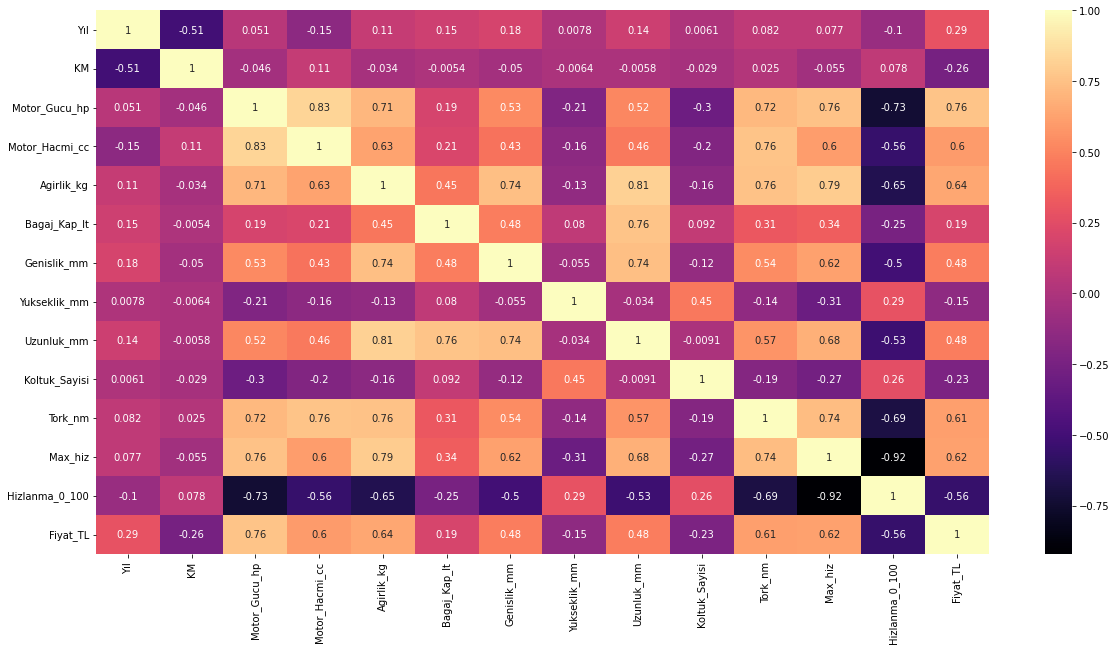

In [59]:
sb.heatmap(car2.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

Let's look relationship car price with other features.Horse power(Motor_Gucu)=0.76 has much correlation with car price.Accerelation(Hizlanma_0_100) has negative correlation with car price.It means while car_price increase , accerelation decrease .

In [60]:
car_n=car.copy()
#car_n  will be normalize dataframe of car

In [61]:
from sklearn.model_selection import train_test_split

Now , all columns are numeric value

I will divide our car dara into 67% for learning, and 33% for testing.

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
car_n_train, car_n_test= train_test_split(car_n, train_size=0.67, test_size=0.33, random_state = 0)

Now I want to scaling my features except unit8 data dtype.

In [64]:
from sklearn.preprocessing import StandardScaler,scale
from sklearn.compose import ColumnTransformer

In [65]:
scaling_columns=['Yıl','KM','Motor_Gucu_hp','Motor_Hacmi_cc','Agirlik_kg','Bagaj_Kap_lt','Genislik_mm'
,'Yukseklik_mm','Uzunluk_mm','Koltuk_Sayisi','Tork_nm','Max_hiz','Hizlanma_0_100','Fiyat_TL']

In [66]:
features_train=car_n_train[scaling_columns]

In [67]:
scaler=StandardScaler().fit(features_train.values)

In [68]:
features_train=scaler.transform(features_train.values)

In [69]:
car_n_train[scaling_columns]=features_train

In [70]:
features_test=car_n_test[scaling_columns]

In [71]:
scaler_test=StandardScaler().fit(features_test.values)

In [72]:
features_test=scaler_test.transform(features_test.values)

In [73]:
car_n_test[scaling_columns]=features_test

In [74]:
car_n_test

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
934,871416466,-0.429756,-0.050334,0.504301,-0.040939,0.056419,0.237942,0.151967,-0.749803,0.265942,0.178973,-0.028684,1.217217,-1.269453,1,1,1,0.004350,9,0,1,0,0,1,0,1,0,0,0,0
279,864577585,0.058569,1.679898,-0.677862,-0.122899,-1.439799,0.507215,-0.997170,0.284542,-0.400548,0.178973,-0.239318,-1.049478,0.387786,0,1,1,-0.710148,21,0,0,1,1,0,0,0,0,1,0,0
14,876739433,0.302731,0.050055,0.716484,0.806696,1.128709,0.859342,0.899818,0.340453,1.277517,0.178973,0.497902,1.670557,-1.223419,0,1,1,0.975584,57,0,1,0,0,0,1,1,0,0,0,0
681,875770459,0.302731,-0.209775,-0.799109,-0.795831,-1.614358,-1.615901,-1.252534,0.508184,-1.726760,0.178973,-1.387276,-1.502817,1.078302,0,1,1,-0.578391,43,0,0,1,1,0,0,1,0,0,0,0
458,861443351,-0.185594,-0.812109,-0.011001,-0.254466,-0.641816,-1.854104,-1.380216,-0.861624,-1.906070,0.178973,-0.344636,0.174537,-1.039281,0,0,1,-0.134484,61,0,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,861868190,1.035218,-0.977455,0.201182,-0.256623,-1.100656,-0.797725,0.243168,-0.330474,-0.894494,0.178973,-0.028684,0.446541,-0.947212,1,1,1,-0.070940,89,0,0,1,0,0,1,1,0,0,0,0
12,876423443,0.302731,0.073676,-0.571770,-0.621127,-0.766501,-0.052045,-0.504683,0.256587,0.252409,0.178973,-1.313554,-1.049478,1.032267,1,1,1,-0.533217,98,0,0,1,1,0,0,1,0,0,0,0
157,876680375,0.058569,-0.245207,0.504301,-0.040939,0.056419,0.237942,0.151967,-0.749803,0.296391,0.178973,-0.028684,1.217217,-1.269453,1,1,1,0.147400,9,0,1,0,0,0,1,1,0,0,0,0
127,875482134,0.791055,-0.934654,1.640995,0.806696,2.001503,-0.745941,1.045740,-0.777758,0.949347,-2.852549,1.235123,2.123896,-1.729797,0,1,1,2.790061,57,0,1,0,0,1,0,1,0,0,0,0


In [75]:
car_n_train

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
235,876410264,0.008298,-0.174312,0.395267,-0.047651,0.193446,0.034503,-0.556543,-0.626277,0.230813,0.163291,-0.109236,1.192839,-0.837190,1,1,1,0.190320,55,0,0,1,0,0,1,1,0,0,0,0
516,876406108,-1.070429,-0.971365,2.516670,3.970476,2.477315,0.732866,0.866053,0.304666,1.093977,0.163291,3.957859,2.110748,-1.682953,0,1,1,1.010166,57,1,0,0,0,1,0,0,0,1,0,0
241,876269057,0.008298,0.306450,-0.208068,-0.624968,-0.648249,0.433568,-0.538068,0.598648,0.335989,0.163291,-0.658843,0.091347,-0.339683,0,0,1,-0.422989,105,0,0,1,1,0,0,1,0,0,0,0
403,857532865,0.817343,-0.749962,-0.383230,-0.434453,-0.114491,-0.963158,-0.205513,-0.430289,-0.534429,0.163291,0.000686,-0.092235,0.108073,1,0,1,0.379515,52,0,0,1,0,0,1,0,0,1,0,0
331,875775491,0.277980,-0.085751,-0.305380,-0.038991,-0.499413,0.533334,-0.279414,0.966126,-0.124607,0.163291,0.660215,-0.184026,-0.240182,0,0,1,-0.536506,28,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,875270265,-0.800747,1.267975,0.803977,1.029045,0.988951,0.633100,1.235558,-0.062811,1.329715,0.163291,1.319743,0.825675,-1.036193,1,0,1,0.032657,3,0,0,1,0,0,1,0,0,1,0,0
192,876110206,-0.531065,0.559483,0.940214,1.106983,0.193446,0.134269,0.071616,-0.699773,0.209053,0.163291,1.319743,1.192839,-1.334698,0,1,1,-0.055634,9,0,1,0,0,0,1,0,0,1,0,0
629,795307082,0.547661,-0.768939,-0.519467,-0.434453,0.167785,-1.252480,-0.501117,-0.601779,-0.969638,0.163291,0.000686,-0.642981,0.506079,1,1,1,0.105182,52,0,0,1,0,0,1,0,0,1,0,0
559,876428297,0.817343,-0.927085,0.006018,-0.038991,0.475722,0.134269,0.053141,-0.381292,0.433911,0.163291,0.660215,0.642093,-0.289932,1,1,1,0.724796,54,0,1,0,0,1,0,0,0,1,0,0


car dataset separation.car data set values normalized.

In [76]:
Y_train = car_n_train.loc[:,car_n_train.columns == 'Fiyat_TL']

X_train = car_n_train.loc[:, car_n_train.columns != 'Fiyat_TL']

Y_test = car_n_test.loc[:,car_n_test.columns == 'Fiyat_TL']

X_test = car_n_test.loc[:,car_n_test.columns != 'Fiyat_TL']

car1 dataset separation. car1 dataset values are not normalized

In [77]:
car1_train, car1_test= train_test_split(car1, train_size=0.67, test_size=0.33, random_state = 0)

y_train = car1_train.loc[:,car1_train.columns == 'Fiyat_TL']

x_train = car1_train.loc[:, car1_train.columns != 'Fiyat_TL']

y_test = car1_test.loc[:,car1_test.columns == 'Fiyat_TL']

x_test = car1_test.loc[:,car1_test.columns != 'Fiyat_TL']

Applying MULTIPLE LINEAR REGRESSION

In [78]:
from sklearn.linear_model import LinearRegression


In [79]:
x_train

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
235,876410264,2015,92000,156,1595,1430.0,470.0,1777.0,1432.0,4630.0,5.0,250.0,230.0,8.6,1,1,1,55,0,0,1,0,0,1,1,0,0,0,0
516,876406108,2011,29000,265,2987,1875.0,540.0,1854.0,1470.0,4868.0,5.0,620.0,250.0,6.9,0,1,1,57,1,0,0,0,1,0,0,0,1,0,0
241,876269057,2015,130000,125,1395,1266.0,510.0,1778.0,1482.0,4659.0,5.0,200.0,206.0,9.6,0,0,1,105,0,0,1,1,0,0,1,0,0,0,0
403,857532865,2018,46500,116,1461,1370.0,370.0,1796.0,1440.0,4419.0,5.0,260.0,202.0,10.5,1,0,1,52,0,0,1,0,0,1,0,0,1,0,0
331,875775491,2016,99000,120,1598,1295.0,520.0,1792.0,1497.0,4532.0,5.0,320.0,200.0,9.8,0,0,1,28,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,875270265,2012,206000,177,1968,1585.0,530.0,1874.0,1455.0,4933.0,5.0,380.0,222.0,8.2,1,0,1,3,0,0,1,0,0,1,0,0,1,0,0
192,876110206,2013,150000,184,1995,1430.0,480.0,1811.0,1429.0,4624.0,5.0,380.0,230.0,7.6,0,1,1,9,0,1,0,0,0,1,0,0,1,0,0
629,795307082,2017,45000,109,1461,1425.0,341.0,1780.0,1433.0,4299.0,5.0,260.0,190.0,11.3,1,1,1,52,0,0,1,0,0,1,0,0,1,0,0
559,876428297,2018,32500,136,1598,1485.0,480.0,1810.0,1442.0,4686.0,5.0,320.0,218.0,9.7,1,1,1,54,0,1,0,0,1,0,0,0,1,0,0


In [80]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [81]:
y_pred=regressor.predict(x_test)

In [82]:
car1

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,873331197,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,876006641,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,875785619,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,862667303,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,872696372,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,875534471,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,876508395,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [83]:
y_pred=pd.DataFrame(y_pred)

In [84]:
y_pred

,0
0,389572.752548
1,-24984.312521
2,516359.360975
3,48062.917757
4,183906.134642
...,...
316,312450.261854
317,221130.422387
318,385127.858304
319,958097.395930


In [85]:
pd.concat([d.reset_index(drop=True) for d in [y_test, y_pred]], axis=1)


# ACTUAL PRICE-PREDICTION PRICE

,Fiyat_TL,0
0,320000,389572.752548
1,82750,-24984.312521
2,642500,516359.360975
3,126500,48062.917757
4,273900,183906.134642
...,...,...
316,295000,312450.261854
317,141500,221130.422387
318,367500,385127.858304
319,1245000,958097.395930


In [86]:
from sklearn.metrics import r2_score 

In [87]:
r2_score(y_test,y_pred)

0.758819906122364

I am going to study which features effect car price more with BACKWARD ELIMINATION metod.

In [88]:
import statsmodels.api as sm

In [89]:
X=np.append(arr=np.ones((971,1)).astype(int),values=car1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,
                   20,21,22,23,24,25,26,27,28,29]].values,axis=1)

In [90]:
X_list=car1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,
                   20,21,22,23,24,25,26,27,28,29]].values

In [91]:
X_list=np.array(X_list,dtype=float)

In [92]:
X_list=pd.DataFrame(X_list)

In [93]:
X_list

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,873720347.0,2020.0,8000.0,101.0,1301.0,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1.0,0.0,1.0,80.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,873331197.0,2020.0,7850.0,101.0,1301.0,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,876006641.0,2015.0,260000.0,90.0,1364.0,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1.0,1.0,1.0,98.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,875785619.0,2010.0,252000.0,110.0,1560.0,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0.0,1.0,1.0,34.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,862667303.0,2013.0,87000.0,105.0,1598.0,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0.0,0.0,1.0,91.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456.0,2016.0,95000.0,136.0,1598.0,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1.0,1.0,1.0,67.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
967,872696372.0,2015.0,21000.0,136.0,1582.0,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0.0,1.0,1.0,44.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
968,875534471.0,2018.0,99750.0,100.0,1560.0,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1.0,1.0,1.0,72.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
969,876508395.0,2016.0,44000.0,90.0,1422.0,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0.0,1.0,1.0,108.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [94]:
model=sm.OLS(car1.iloc[:,17:18],X_list).fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Fiyat_TL   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.68e-250
Time:                        19:58:24   Log-Likelihood:                -13049.
No. Observations:                 971   AIC:                         2.615e+04
Df Residuals:                     944   BIC:                         2.628e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0001      0.000     -0.260      0.795      -0.001       0.001
1           1.226e+04   2007.035      6.111      0.000    8325.739    1.62e+04
2             -0.4605      0.081     -5.674      0.000      -0.620      -0.301
3           4105.6006    343.911     11.938      0.000    3430.683    4780.518
4            -49.0153     34.995     -1.401      0.162    -117.693      19.662
5            106.8126     82.979      1.287      0.198     -56.032     269.657
6           -310.1725    102.311     -3.032      0.002    -510.956    -109.389
7           -164.2392    165.206     -0.994      0.320    -488.453     159.975
8             18.1845    170.482      0.107      0.915    -316.383     352.752
9            129.2445     57.916      2.232      0.026      15.585     242.904
10         -3.889e+04   2.23e+04     -1.744      0.082   -8.27e+04    4882.800
11            77.6181    204.377      0.380      0.704    -323.469     478.705
12          1536.6731   1038.216      1.480      0.139    -500.806    3574.152
13          3.181e+04   8213.291      3.874      0.000    1.57e+04    4.79e+04
14          1.564e+04   1.21e+04      1.297      0.195   -8021.759    3.93e+04
15          5023.3197   1.16e+04      0.433      0.665   -1.77e+04    2.78e+04
16         -2.407e+05   2.74e+04     -8.772      0.000   -2.95e+05   -1.87e+05
17           760.2415    181.800      4.182      0.000     403.462    1117.021
18         -9.696e+06   1.57e+06     -6.177      0.000   -1.28e+07   -6.62e+06
19         -9.798e+06   1.57e+06     -6.242      0.000   -1.29e+07   -6.72e+06
20         -9.886e+06   1.57e+06     -6.292      0.000    -1.3e+07    -6.8e+06
21         -9.779e+06   1.57e+06     -6.233      0.000   -1.29e+07    -6.7e+06
22         -9.774e+06   1.57e+06     -6.225      0.000   -1.29e+07   -6.69e+06
23         -9.826e+06   1.57e+06     -6.254      0.000   -1.29e+07   -6.74e+06
24          -5.72e+06   9.49e+05     -6.027      0.000   -7.58e+06   -3.86e+06
25         -5.676e+06   9.45e+05     -6.007      0.000   -7.53e+06   -3.82e+06
26         -5.671e+06   9.51e+05     -5.963      0.000   -7.54e+06    -3.8e+06
27         -6.445e+06    9.4e+05     -6.853      0.000   -8.29e+06    -4.6e+06
28         -5.867e+06   9.45e+05     -6.210      0.000   -7.72e+06   -4.01e+06
==============================================================================
Omnibus:                     1265.932   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           452913.836
Skew:                           6.500   Prob(JB):                         0.00
Kurtosis:                     108.003   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

It means if P>|t| value close to zero car price is affected from this feature more.When P>|t| value close to 1 , car price is not affected this feature.0 th feature's P>|t| value equals to 0.795.This feature correspond to 'ilan_no' feuture. It means ilan_no does not affect car price much . Same thing is valid also 8th column='Yukseklik',11th column 'Tork'

In [96]:
x_train

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
235,876410264,2015,92000,156,1595,1430.0,470.0,1777.0,1432.0,4630.0,5.0,250.0,230.0,8.6,1,1,1,55,0,0,1,0,0,1,1,0,0,0,0
516,876406108,2011,29000,265,2987,1875.0,540.0,1854.0,1470.0,4868.0,5.0,620.0,250.0,6.9,0,1,1,57,1,0,0,0,1,0,0,0,1,0,0
241,876269057,2015,130000,125,1395,1266.0,510.0,1778.0,1482.0,4659.0,5.0,200.0,206.0,9.6,0,0,1,105,0,0,1,1,0,0,1,0,0,0,0
403,857532865,2018,46500,116,1461,1370.0,370.0,1796.0,1440.0,4419.0,5.0,260.0,202.0,10.5,1,0,1,52,0,0,1,0,0,1,0,0,1,0,0
331,875775491,2016,99000,120,1598,1295.0,520.0,1792.0,1497.0,4532.0,5.0,320.0,200.0,9.8,0,0,1,28,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,875270265,2012,206000,177,1968,1585.0,530.0,1874.0,1455.0,4933.0,5.0,380.0,222.0,8.2,1,0,1,3,0,0,1,0,0,1,0,0,1,0,0
192,876110206,2013,150000,184,1995,1430.0,480.0,1811.0,1429.0,4624.0,5.0,380.0,230.0,7.6,0,1,1,9,0,1,0,0,0,1,0,0,1,0,0
629,795307082,2017,45000,109,1461,1425.0,341.0,1780.0,1433.0,4299.0,5.0,260.0,190.0,11.3,1,1,1,52,0,0,1,0,0,1,0,0,1,0,0
559,876428297,2018,32500,136,1598,1485.0,480.0,1810.0,1442.0,4686.0,5.0,320.0,218.0,9.7,1,1,1,54,0,1,0,0,1,0,0,0,1,0,0


In [97]:
X_list

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,873720347.0,2020.0,8000.0,101.0,1301.0,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1.0,0.0,1.0,80.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,873331197.0,2020.0,7850.0,101.0,1301.0,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,876006641.0,2015.0,260000.0,90.0,1364.0,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1.0,1.0,1.0,98.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,875785619.0,2010.0,252000.0,110.0,1560.0,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0.0,1.0,1.0,34.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,862667303.0,2013.0,87000.0,105.0,1598.0,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0.0,0.0,1.0,91.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456.0,2016.0,95000.0,136.0,1598.0,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1.0,1.0,1.0,67.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
967,872696372.0,2015.0,21000.0,136.0,1582.0,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0.0,1.0,1.0,44.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
968,875534471.0,2018.0,99750.0,100.0,1560.0,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1.0,1.0,1.0,72.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
969,876508395.0,2016.0,44000.0,90.0,1422.0,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0.0,1.0,1.0,108.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


First I am going to remove column which has maximum P>|t|=0.915 value.It is feature 8='Yukseklik'

In [98]:
car12=car1.copy()
del car12['Yukseklik_mm']


In [99]:
car1

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,873331197,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,876006641,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,875785619,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,862667303,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,872696372,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,875534471,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,876508395,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [100]:
car12

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,2020,8000,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,873331197,2020,7850,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,876006641,2015,260000,90,1364,1300.000000,452.000000,1775.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,875785619,2010,252000,110,1560,1385.000000,526.000000,2019.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,862667303,2013,87000,105,1598,1263.000000,590.000000,1814.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,2016,95000,136,1598,1548.000000,500.000000,1856.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,872696372,2015,21000,136,1582,1391.000000,378.000000,1780.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,875534471,2018,99750,100,1560,1090.000000,640.000000,1748.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,876508395,2016,44000,90,1422,1165.000000,280.000000,1682.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [101]:
import statsmodels.api as sm

X=np.append(arr=np.ones((971,1)).astype(int),values=car12.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,
                   20,21,22,23,24,25,26,27,28]].values,axis=1)
X_list=car12.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,
                   20,21,22,23,24,25,26,27,28]].values
X_list=np.array(X_list,dtype=float)

In [102]:
model=sm.OLS(car12.iloc[:,16:17],X_list).fit()

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Fiyat_TL   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.64e-251
Time:                        19:58:24   Log-Likelihood:                -13049.
No. Observations:                 971   AIC:                         2.615e+04
Df Residuals:                     945   BIC:                         2.628e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0001      0.000     -0.260      0.795      -0.001       0.001
x2          1.226e+04   2004.613      6.114      0.000    8322.581    1.62e+04
x3            -0.4605      0.081     -5.678      0.000      -0.620      -0.301
x4          4109.2011    342.071     12.013      0.000    3437.894    4780.508
x5           -49.4522     34.737     -1.424      0.155    -117.622      18.718
x6           107.4030     82.751      1.298      0.195     -54.993     269.799
x7          -309.6077    102.120     -3.032      0.002    -510.017    -109.199
x8          -162.8107    164.576     -0.989      0.323    -485.788     160.167
x9           129.4113     57.865      2.236      0.026      15.853     242.970
x10        -3.799e+04   2.06e+04     -1.841      0.066   -7.85e+04    2506.590
x11           80.1724    202.864      0.395      0.693    -317.943     478.287
x12         1508.3407   1003.137      1.504      0.133    -460.294    3476.975
x13         3.177e+04   8199.992      3.875      0.000    1.57e+04    4.79e+04
x14         1.557e+04    1.2e+04      1.294      0.196   -8044.293    3.92e+04
x15         5052.0333   1.16e+04      0.436      0.663   -1.77e+04    2.78e+04
x16        -2.408e+05   2.74e+04     -8.785      0.000   -2.95e+05   -1.87e+05
x17          762.0479    180.915      4.212      0.000     407.006    1117.089
x18        -9.681e+06   1.56e+06     -6.195      0.000   -1.27e+07   -6.61e+06
x19        -9.783e+06   1.56e+06     -6.260      0.000   -1.29e+07   -6.72e+06
x20        -9.871e+06   1.56e+06     -6.310      0.000   -1.29e+07    -6.8e+06
x21        -9.764e+06   1.56e+06     -6.251      0.000   -1.28e+07    -6.7e+06
x22        -9.759e+06   1.56e+06     -6.243      0.000   -1.28e+07   -6.69e+06
x23        -9.812e+06   1.56e+06     -6.272      0.000   -1.29e+07   -6.74e+06
x24         -5.71e+06   9.44e+05     -6.048      0.000   -7.56e+06   -3.86e+06
x25        -5.667e+06    9.4e+05     -6.027      0.000   -7.51e+06   -3.82e+06
x26        -5.662e+06   9.47e+05     -5.982      0.000   -7.52e+06    -3.8e+06
x27        -6.438e+06   9.37e+05     -6.867      0.000   -8.28e+06    -4.6e+06
x28        -5.859e+06   9.41e+05     -6.225      0.000   -7.71e+06   -4.01e+06
==============================================================================
Omnibus:                     1265.928   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           452795.797
Skew:                           6.500   Prob(JB):                         0.00
Kurtosis:                     107.989   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.38e-12. This might indicate

In [104]:
car12

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,2020,8000,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,873331197,2020,7850,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,876006641,2015,260000,90,1364,1300.000000,452.000000,1775.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,875785619,2010,252000,110,1560,1385.000000,526.000000,2019.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,862667303,2013,87000,105,1598,1263.000000,590.000000,1814.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,2016,95000,136,1598,1548.000000,500.000000,1856.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,872696372,2015,21000,136,1582,1391.000000,378.000000,1780.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,875534471,2018,99750,100,1560,1090.000000,640.000000,1748.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,876508395,2016,44000,90,1422,1165.000000,280.000000,1682.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


I am applying prediction again without 'Yukseklik_mm' column=8

In [105]:
x_train=x_train.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,18,19,
                   20,21,22,23,24,25,26,27,28]]

In [106]:
x_test=x_test.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,18,19,
                   20,21,22,23,24,25,26,27,28]]

In [107]:
regressor.fit(x_train,y_train)
y_pred2=regressor.predict(x_test)

In [108]:
y_pred2=pd.DataFrame(y_pred2)

In [109]:
y_pred2

,0
0,399750.377547
1,201.654568
2,500372.927142
3,59750.835273
4,179283.909496
...,...
316,285058.122132
317,193951.235253
318,397241.327703
319,948437.269908


In [110]:
pd.concat([d.reset_index(drop=True) for d in [y_test, y_pred,y_pred2]], axis=1)

## ACTUAL PRICE-PREDICTION1-PREDICTION2

,Fiyat_TL,0,0
0,320000,389572.752548,399750.377547
1,82750,-24984.312521,201.654568
2,642500,516359.360975,500372.927142
3,126500,48062.917757,59750.835273
4,273900,183906.134642,179283.909496
...,...,...,...
316,295000,312450.261854,285058.122132
317,141500,221130.422387,193951.235253
318,367500,385127.858304,397241.327703
319,1245000,958097.395930,948437.269908


Some values are predicted better but some values are predicted worse.
0. row worse,1. better ,2. worse,3.better,4. worse ....

In [111]:
x_test

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
934,871416466,2013,98500,170,1598,1390.0,480.0,1811.0,4624.0,5.0,250.0,230.0,7.6,1,1,1,0,1,0,0,1,0,1,0,0,0,0
279,864577585,2015,245000,92,1560,1090.0,506.0,1748.0,4427.0,5.0,230.0,180.0,11.2,0,1,1,0,0,1,1,0,0,0,0,1,0,0
14,876739433,2016,107000,184,1991,1605.0,540.0,1852.0,4923.0,5.0,300.0,240.0,7.7,0,1,1,0,1,0,0,0,1,1,0,0,0,0
681,875770459,2016,85000,84,1248,1055.0,301.0,1734.0,4035.0,5.0,121.0,170.0,12.7,0,1,1,0,0,1,1,0,0,1,0,0,0,0
458,861443351,2014,34000,136,1499,1250.0,278.0,1727.0,3982.0,5.0,220.0,207.0,8.1,0,0,1,0,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,861868190,2019,20000,150,1498,1158.0,380.0,1816.0,4281.0,5.0,250.0,213.0,8.3,1,1,1,0,0,1,0,0,1,1,0,0,0,0
12,876423443,2016,109000,99,1329,1225.0,452.0,1775.0,4620.0,5.0,128.0,180.0,12.6,1,1,1,0,0,1,1,0,0,1,0,0,0,0
157,876680375,2015,82000,170,1598,1390.0,480.0,1811.0,4633.0,5.0,250.0,230.0,7.6,1,1,1,0,1,0,0,0,1,1,0,0,0,0
127,875482134,2018,23624,245,1991,1780.0,385.0,1860.0,4826.0,4.0,370.0,250.0,6.6,0,1,1,0,1,0,0,1,0,1,0,0,0,0


In [112]:
del car12['ilan No']

In [113]:
car12

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [114]:
X=np.append(arr=np.ones((971,1)).astype(int),values=car12.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,
                   20,21,22,23,24,25,26,27]].values,axis=1)

In [115]:
X_list=car12.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,
                   20,21,22,23,24,25,26,27]].values

In [116]:
X_list=pd.DaX_list=np.array(X_list,dtype=float)
X_list=pd.DataFrame(X_list)

In [117]:
model=sm.OLS(car12.iloc[:,15:16],X_list).fit()

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Fiyat_TL   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.60e-252
Time:                        19:58:25   Log-Likelihood:                -13049.
No. Observations:                 971   AIC:                         2.615e+04
Df Residuals:                     946   BIC:                         2.627e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.225e+04   2003.556      6.115      0.000    8320.365    1.62e+04
1             -0.4616      0.081     -5.702      0.000      -0.621      -0.303
2           4115.0771    341.153     12.062      0.000    3445.573    4784.581
3            -49.6526     34.711     -1.430      0.153    -117.772      18.467
4            105.8193     82.485      1.283      0.200     -56.055     267.693
5           -309.1109    102.052     -3.029      0.003    -509.385    -108.836
6           -161.6249    164.432     -0.983      0.326    -484.318     161.068
7            129.6287     57.830      2.242      0.025      16.138     243.119
8          -3.787e+04   2.06e+04     -1.837      0.067   -7.83e+04    2591.086
9             80.6948    202.754      0.398      0.691    -317.204     478.593
10          1491.5709   1000.561      1.491      0.136    -472.005    3455.147
11          3.167e+04   8185.488      3.869      0.000    1.56e+04    4.77e+04
12          1.569e+04    1.2e+04      1.305      0.192   -7906.162    3.93e+04
13          5256.6093   1.16e+04      0.455      0.649   -1.74e+04    2.79e+04
14         -2.406e+05   2.74e+04     -8.785      0.000   -2.94e+05   -1.87e+05
15           763.9718    180.674      4.228      0.000     409.404    1118.540
16         -9.712e+06   1.56e+06     -6.237      0.000   -1.28e+07   -6.66e+06
17         -9.814e+06   1.56e+06     -6.302      0.000   -1.29e+07   -6.76e+06
18         -9.903e+06   1.56e+06     -6.353      0.000    -1.3e+07   -6.84e+06
19         -9.796e+06   1.56e+06     -6.293      0.000   -1.29e+07   -6.74e+06
20         -9.791e+06   1.56e+06     -6.285      0.000   -1.28e+07   -6.73e+06
21         -9.843e+06   1.56e+06     -6.314      0.000   -1.29e+07   -6.78e+06
22         -5.729e+06   9.41e+05     -6.089      0.000   -7.58e+06   -3.88e+06
23         -5.686e+06   9.37e+05     -6.068      0.000   -7.52e+06   -3.85e+06
24          -5.68e+06   9.43e+05     -6.021      0.000   -7.53e+06   -3.83e+06
25         -6.458e+06   9.34e+05     -6.916      0.000   -8.29e+06   -4.63e+06
26         -5.876e+06   9.38e+05     -6.264      0.000   -7.72e+06   -4.04e+06
==============================================================================
Omnibus:                     1265.138   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           451658.879
Skew:                           6.493   Prob(JB):                         0.00
Kurtosis:                     107.857   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [119]:
x_train

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
235,876410264,2015,92000,156,1595,1430.0,470.0,1777.0,4630.0,5.0,250.0,230.0,8.6,1,1,1,0,0,1,0,0,1,1,0,0,0,0
516,876406108,2011,29000,265,2987,1875.0,540.0,1854.0,4868.0,5.0,620.0,250.0,6.9,0,1,1,1,0,0,0,1,0,0,0,1,0,0
241,876269057,2015,130000,125,1395,1266.0,510.0,1778.0,4659.0,5.0,200.0,206.0,9.6,0,0,1,0,0,1,1,0,0,1,0,0,0,0
403,857532865,2018,46500,116,1461,1370.0,370.0,1796.0,4419.0,5.0,260.0,202.0,10.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0
331,875775491,2016,99000,120,1598,1295.0,520.0,1792.0,4532.0,5.0,320.0,200.0,9.8,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,875270265,2012,206000,177,1968,1585.0,530.0,1874.0,4933.0,5.0,380.0,222.0,8.2,1,0,1,0,0,1,0,0,1,0,0,1,0,0
192,876110206,2013,150000,184,1995,1430.0,480.0,1811.0,4624.0,5.0,380.0,230.0,7.6,0,1,1,0,1,0,0,0,1,0,0,1,0,0
629,795307082,2017,45000,109,1461,1425.0,341.0,1780.0,4299.0,5.0,260.0,190.0,11.3,1,1,1,0,0,1,0,0,1,0,0,1,0,0
559,876428297,2018,32500,136,1598,1485.0,480.0,1810.0,4686.0,5.0,320.0,218.0,9.7,1,1,1,0,1,0,0,1,0,0,0,1,0,0


In [120]:
x_train=x_train.iloc[:,1:]

In [121]:
x_train

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
235,2015,92000,156,1595,1430.0,470.0,1777.0,4630.0,5.0,250.0,230.0,8.6,1,1,1,0,0,1,0,0,1,1,0,0,0,0
516,2011,29000,265,2987,1875.0,540.0,1854.0,4868.0,5.0,620.0,250.0,6.9,0,1,1,1,0,0,0,1,0,0,0,1,0,0
241,2015,130000,125,1395,1266.0,510.0,1778.0,4659.0,5.0,200.0,206.0,9.6,0,0,1,0,0,1,1,0,0,1,0,0,0,0
403,2018,46500,116,1461,1370.0,370.0,1796.0,4419.0,5.0,260.0,202.0,10.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0
331,2016,99000,120,1598,1295.0,520.0,1792.0,4532.0,5.0,320.0,200.0,9.8,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2012,206000,177,1968,1585.0,530.0,1874.0,4933.0,5.0,380.0,222.0,8.2,1,0,1,0,0,1,0,0,1,0,0,1,0,0
192,2013,150000,184,1995,1430.0,480.0,1811.0,4624.0,5.0,380.0,230.0,7.6,0,1,1,0,1,0,0,0,1,0,0,1,0,0
629,2017,45000,109,1461,1425.0,341.0,1780.0,4299.0,5.0,260.0,190.0,11.3,1,1,1,0,0,1,0,0,1,0,0,1,0,0
559,2018,32500,136,1598,1485.0,480.0,1810.0,4686.0,5.0,320.0,218.0,9.7,1,1,1,0,1,0,0,1,0,0,0,1,0,0


In [122]:
x_test=x_test.iloc[:,1:]

In [123]:
regressor.fit(x_train,y_train)
y_pred3=regressor.predict(x_test)
y_pred3=pd.DataFrame(y_pred)


In [124]:
pd.concat([d.reset_index(drop=True) for d in [y_test, y_pred,y_pred2,y_pred3]], axis=1)


,Fiyat_TL,0,0,0
0,320000,389572.752548,399750.377547,389572.752548
1,82750,-24984.312521,201.654568,-24984.312521
2,642500,516359.360975,500372.927142,516359.360975
3,126500,48062.917757,59750.835273,48062.917757
4,273900,183906.134642,179283.909496,183906.134642
...,...,...,...,...
316,295000,312450.261854,285058.122132,312450.261854
317,141500,221130.422387,193951.235253,221130.422387
318,367500,385127.858304,397241.327703,385127.858304
319,1245000,958097.395930,948437.269908,958097.395930


I will delete another biggest p>|t| value column='Tork_nm'

In [125]:
x_train=x_train.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,
                   20,21,22,23,24,25]]

In [126]:
x_test=x_test.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,
                   20,21,22,23,24,25]]

In [127]:
regressor.fit(x_train,y_train)
y_pred4=regressor.predict(x_test)
y_pred4=pd.DataFrame(y_pred4)

In [128]:
y_pred4

,0
0,399595.426578
1,319.448139
2,500281.721430
3,59634.567187
4,179583.266086
...,...
316,285366.324053
317,193768.683636
318,396964.705074
319,948261.453708


In [129]:
pd.concat([d.reset_index(drop=True) for d in [y_test, y_pred,y_pred2,y_pred3,y_pred4]], axis=1)


,Fiyat_TL,0,0,0,0
0,320000,389572.752548,399750.377547,389572.752548,399595.426578
1,82750,-24984.312521,201.654568,-24984.312521,319.448139
2,642500,516359.360975,500372.927142,516359.360975,500281.721430
3,126500,48062.917757,59750.835273,48062.917757,59634.567187
4,273900,183906.134642,179283.909496,183906.134642,179583.266086
...,...,...,...,...,...
316,295000,312450.261854,285058.122132,312450.261854,285366.324053
317,141500,221130.422387,193951.235253,221130.422387,193768.683636
318,367500,385127.858304,397241.327703,385127.858304,396964.705074
319,1245000,958097.395930,948437.269908,958097.395930,948261.453708


In [130]:
del car12['Tork_nm']

In [131]:
car12

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,4620.000000,5.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,4337.000000,5.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,4659.000000,5.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,4842.000000,5.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,4300.000000,5.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,4445.000000,5.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,3972.000000,5.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [132]:
X=np.append(arr=np.ones((971,1)).astype(int),values=car12.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,
                   20,21,22,23,24,25,26]].values,axis=1)

In [133]:
X_list=car12.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,
                   20,21,22,23,24,25,26]].values

In [134]:
X_list=np.array(X_list,dtype=float)
X_list=pd.DataFrame(X_list)

In [135]:
model=sm.OLS(car12.iloc[:,14:15],X_list).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Fiyat_TL   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.61e-253
Time:                        19:58:25   Log-Likelihood:                -13050.
No. Observations:                 971   AIC:                         2.615e+04
Df Residuals:                     947   BIC:                         2.626e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            1.23e+04   1999.753      6.148      0.000    8370.828    1.62e+04
1             -0.4618      0.081     -5.707      0.000      -0.621      -0.303
2           4156.5589    324.697     12.801      0.000    3519.350    4793.768
3            -46.7155     33.902     -1.378      0.169    -113.248      19.817
4            116.9963     77.522      1.509      0.132     -35.139     269.131
5           -310.8949    101.908     -3.051      0.002    -510.887    -110.903
6           -163.0129    164.322     -0.992      0.321    -485.490     159.464
7            127.1512     57.469      2.213      0.027      14.371     239.932
8          -3.812e+04   2.06e+04     -1.850      0.065   -7.85e+04    2309.803
9           1518.1099    997.893      1.521      0.129    -440.227    3476.447
10          3.075e+04   7849.647      3.917      0.000    1.53e+04    4.62e+04
11          1.557e+04    1.2e+04      1.296      0.195   -8004.163    3.91e+04
12          5415.2832   1.15e+04      0.469      0.639   -1.72e+04    2.81e+04
13         -2.403e+05   2.74e+04     -8.781      0.000   -2.94e+05   -1.87e+05
14           763.6262    180.592      4.228      0.000     409.220    1118.032
15         -9.742e+06   1.55e+06     -6.266      0.000   -1.28e+07   -6.69e+06
16         -9.847e+06   1.55e+06     -6.334      0.000   -1.29e+07    -6.8e+06
17         -9.934e+06   1.56e+06     -6.384      0.000    -1.3e+07   -6.88e+06
18         -9.827e+06   1.55e+06     -6.324      0.000   -1.29e+07   -6.78e+06
19         -9.822e+06   1.56e+06     -6.316      0.000   -1.29e+07   -6.77e+06
20         -9.875e+06   1.56e+06     -6.345      0.000   -1.29e+07   -6.82e+06
21         -5.742e+06    9.4e+05     -6.108      0.000   -7.59e+06    -3.9e+06
22         -5.699e+06   9.36e+05     -6.088      0.000   -7.54e+06   -3.86e+06
23         -5.687e+06   9.43e+05     -6.032      0.000   -7.54e+06   -3.84e+06
24         -6.499e+06   9.27e+05     -7.008      0.000   -8.32e+06   -4.68e+06
25         -5.896e+06   9.36e+05     -6.297      0.000   -7.73e+06   -4.06e+06
==============================================================================
Omnibus:                     1269.352   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458621.459
Skew:                           6.531   Prob(JB):                         0.00
Kurtosis:                     108.665   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

12. column='Takas' looks high p>|t| value .It means it does not affect car price much. I must remove it

In [136]:
x_train

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
235,2015,92000,156,1595,1430.0,470.0,1777.0,4630.0,5.0,230.0,8.6,1,1,1,0,0,1,0,0,1,1,0,0,0,0
516,2011,29000,265,2987,1875.0,540.0,1854.0,4868.0,5.0,250.0,6.9,0,1,1,1,0,0,0,1,0,0,0,1,0,0
241,2015,130000,125,1395,1266.0,510.0,1778.0,4659.0,5.0,206.0,9.6,0,0,1,0,0,1,1,0,0,1,0,0,0,0
403,2018,46500,116,1461,1370.0,370.0,1796.0,4419.0,5.0,202.0,10.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0
331,2016,99000,120,1598,1295.0,520.0,1792.0,4532.0,5.0,200.0,9.8,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2012,206000,177,1968,1585.0,530.0,1874.0,4933.0,5.0,222.0,8.2,1,0,1,0,0,1,0,0,1,0,0,1,0,0
192,2013,150000,184,1995,1430.0,480.0,1811.0,4624.0,5.0,230.0,7.6,0,1,1,0,1,0,0,0,1,0,0,1,0,0
629,2017,45000,109,1461,1425.0,341.0,1780.0,4299.0,5.0,190.0,11.3,1,1,1,0,0,1,0,0,1,0,0,1,0,0
559,2018,32500,136,1598,1485.0,480.0,1810.0,4686.0,5.0,218.0,9.7,1,1,1,0,1,0,0,1,0,0,0,1,0,0


In [137]:
x_train=x_train.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,13,14,15,16,17,18,19,
                   20,21,22,23,24]]

In [138]:
x_test=x_test.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,13,14,15,16,17,18,19,
                   20,21,22,23,24]]

In [139]:
regressor.fit(x_train,y_train)
y_pred5=regressor.predict(x_test)
y_pred5=pd.DataFrame(y_pred5)

In [140]:
pd.concat([d.reset_index(drop=True) for d in [y_test, y_pred,y_pred2,y_pred3,y_pred4,y_pred5]], axis=1)


,Fiyat_TL,0,0,0,0,0
0,320000,389572.752548,399750.377547,389572.752548,399595.426578,403341.986409
1,82750,-24984.312521,201.654568,-24984.312521,319.448139,-6820.713179
2,642500,516359.360975,500372.927142,516359.360975,500281.721430,502946.355528
3,126500,48062.917757,59750.835273,48062.917757,59634.567187,53827.886148
4,273900,183906.134642,179283.909496,183906.134642,179583.266086,198839.137085
...,...,...,...,...,...,...
316,295000,312450.261854,285058.122132,312450.261854,285366.324053,292417.562729
317,141500,221130.422387,193951.235253,221130.422387,193768.683636,182819.507699
318,367500,385127.858304,397241.327703,385127.858304,396964.705074,400973.788027
319,1245000,958097.395930,948437.269908,958097.395930,948261.453708,905074.905016


In [141]:
del car12['Takas']

In [142]:
car12

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Max_hiz,Hizlanma_0_100,Garanti,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,203.725469,10.307514,1,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,4559.427313,4.949946,203.725469,10.307514,1,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,4620.000000,5.000000,180.000000,12.500000,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,4337.000000,5.000000,190.000000,11.100000,0,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,4659.000000,5.000000,194.000000,10.900000,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,4842.000000,5.000000,200.000000,10.900000,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,4300.000000,5.000000,200.000000,10.600000,0,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,4445.000000,5.000000,183.000000,10.800000,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,3972.000000,5.000000,184.000000,10.900000,0,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [143]:
X=np.append(arr=np.ones((971,1)).astype(int),values=car12.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,
                   20,21,22,23,24,25]].values,axis=1)
X_list=car12.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,
                   20,21,22,23,24,25]].values
X_list=np.array(X_list,dtype=float)
X_list=pd.DataFrame(X_list)
model=sm.OLS(car12.iloc[:,13:14],X_list).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Fiyat_TL   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     119.0
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.62e-254
Time:                        19:58:25   Log-Likelihood:                -13050.
No. Observations:                 971   AIC:                         2.615e+04
Df Residuals:                     948   BIC:                         2.626e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.227e+04   1998.321      6.141      0.000    8350.502    1.62e+04
1             -0.4622      0.081     -5.715      0.000      -0.621      -0.304
2           4153.8688    324.513     12.800      0.000    3517.022    4790.715
3            -46.1869     33.870     -1.364      0.173    -112.655      20.281
4            116.6836     77.487      1.506      0.132     -35.383     268.750
5           -311.2148    101.864     -3.055      0.002    -511.120    -111.310
6           -161.6858    164.230     -0.985      0.325    -483.982     160.610
7            126.6686     57.436      2.205      0.028      13.953     239.384
8          -3.816e+04   2.06e+04     -1.853      0.064   -7.86e+04    2248.388
9           1527.1188    997.297      1.531      0.126    -430.047    3484.284
10          3.078e+04   7845.999      3.924      0.000    1.54e+04    4.62e+04
11          1.616e+04   1.19e+04      1.353      0.176   -7282.056    3.96e+04
12         -2.399e+05   2.73e+04     -8.774      0.000   -2.94e+05   -1.86e+05
13           763.4753    180.517      4.229      0.000     409.216    1117.734
14         -9.724e+06   1.55e+06     -6.259      0.000   -1.28e+07   -6.67e+06
15         -9.829e+06   1.55e+06     -6.327      0.000   -1.29e+07   -6.78e+06
16         -9.916e+06   1.55e+06     -6.377      0.000    -1.3e+07   -6.86e+06
17         -9.808e+06   1.55e+06     -6.316      0.000   -1.29e+07   -6.76e+06
18         -9.803e+06   1.55e+06     -6.309      0.000   -1.29e+07   -6.75e+06
19         -9.857e+06   1.56e+06     -6.338      0.000   -1.29e+07    -6.8e+06
20         -5.731e+06   9.39e+05     -6.101      0.000   -7.57e+06   -3.89e+06
21         -5.688e+06   9.35e+05     -6.081      0.000   -7.52e+06   -3.85e+06
22         -5.675e+06   9.42e+05     -6.024      0.000   -7.52e+06   -3.83e+06
23         -6.491e+06   9.27e+05     -7.003      0.000   -8.31e+06   -4.67e+06
24         -5.883e+06   9.36e+05     -6.288      0.000   -7.72e+06   -4.05e+06
==============================================================================
Omnibus:                     1270.382   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           460319.572
Skew:                           6.540   Prob(JB):                         0.00
Kurtosis:                     108.861   Cond. No.                     1.11e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

I will remove 6th column 'genislik' which has 0.325 value P>|t|

In [144]:
x_train=x_train.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,18,19,
                   20,21,22]]

In [145]:
x_test=x_test.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,18,19,
                   20,21,22]]

In [146]:
regressor.fit(x_train,y_train)
y_pred6=regressor.predict(x_test)
y_pred6=pd.DataFrame(y_pred6)
pd.concat([d.reset_index(drop=True) for d in [y_test, y_pred,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6]], axis=1)


,Fiyat_TL,0,0,0,0,0,0
0,320000,389572.752548,399750.377547,389572.752548,399595.426578,403341.986409,405130.450627
1,82750,-24984.312521,201.654568,-24984.312521,319.448139,-6820.713179,-9224.628795
2,642500,516359.360975,500372.927142,516359.360975,500281.721430,502946.355528,501747.128637
3,126500,48062.917757,59750.835273,48062.917757,59634.567187,53827.886148,54024.184641
4,273900,183906.134642,179283.909496,183906.134642,179583.266086,198839.137085,194229.668455
...,...,...,...,...,...,...,...
316,295000,312450.261854,285058.122132,312450.261854,285366.324053,292417.562729,301980.157114
317,141500,221130.422387,193951.235253,221130.422387,193768.683636,182819.507699,177924.071899
318,367500,385127.858304,397241.327703,385127.858304,396964.705074,400973.788027,401657.872186
319,1245000,958097.395930,948437.269908,958097.395930,948261.453708,905074.905016,900214.661946


In [147]:
print("Performanse of backward elimination steps")
performance={'Multiple Linear Reg.':[r2_score(y_test,y_pred)],
            'BE 1th step':[r2_score(y_test,y_pred2)],
            'BE 2th step':[r2_score(y_test,y_pred3)],
            'BE 3th step':[r2_score(y_test,y_pred4)],
             'BE 4th step':[r2_score(y_test,y_pred5)],
             'BE 5th step':[r2_score(y_test,y_pred6)],
             
            }
performance=pd.DataFrame(performance)
performance

Performanse of backward elimination steps


,Multiple Linear Reg.,BE 1th step,BE 2th step,BE 3th step,BE 4th step,BE 5th step
0,0.75882,0.754096,0.75882,0.754191,0.751306,0.751133


I could not get efficiency from BACKWARD elimination method.Prediction didn t become better.It had same performance

In [148]:
X_train

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
235,876410264,0.008298,-0.174312,0.395267,-0.047651,0.193446,0.034503,-0.556543,-0.626277,0.230813,0.163291,-0.109236,1.192839,-0.837190,1,1,1,55,0,0,1,0,0,1,1,0,0,0,0
516,876406108,-1.070429,-0.971365,2.516670,3.970476,2.477315,0.732866,0.866053,0.304666,1.093977,0.163291,3.957859,2.110748,-1.682953,0,1,1,57,1,0,0,0,1,0,0,0,1,0,0
241,876269057,0.008298,0.306450,-0.208068,-0.624968,-0.648249,0.433568,-0.538068,0.598648,0.335989,0.163291,-0.658843,0.091347,-0.339683,0,0,1,105,0,0,1,1,0,0,1,0,0,0,0
403,857532865,0.817343,-0.749962,-0.383230,-0.434453,-0.114491,-0.963158,-0.205513,-0.430289,-0.534429,0.163291,0.000686,-0.092235,0.108073,1,0,1,52,0,0,1,0,0,1,0,0,1,0,0
331,875775491,0.277980,-0.085751,-0.305380,-0.038991,-0.499413,0.533334,-0.279414,0.966126,-0.124607,0.163291,0.660215,-0.184026,-0.240182,0,0,1,28,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,875270265,-0.800747,1.267975,0.803977,1.029045,0.988951,0.633100,1.235558,-0.062811,1.329715,0.163291,1.319743,0.825675,-1.036193,1,0,1,3,0,0,1,0,0,1,0,0,1,0,0
192,876110206,-0.531065,0.559483,0.940214,1.106983,0.193446,0.134269,0.071616,-0.699773,0.209053,0.163291,1.319743,1.192839,-1.334698,0,1,1,9,0,1,0,0,0,1,0,0,1,0,0
629,795307082,0.547661,-0.768939,-0.519467,-0.434453,0.167785,-1.252480,-0.501117,-0.601779,-0.969638,0.163291,0.000686,-0.642981,0.506079,1,1,1,52,0,0,1,0,0,1,0,0,1,0,0
559,876428297,0.817343,-0.927085,0.006018,-0.038991,0.475722,0.134269,0.053141,-0.381292,0.433911,0.163291,0.660215,0.642093,-0.289932,1,1,1,54,0,1,0,0,1,0,0,0,1,0,0


In [149]:
car1

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,873331197,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,876006641,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,875785619,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,862667303,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,872696372,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,875534471,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,876508395,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [150]:
car1_train, car1_test= train_test_split(car1, train_size=0.67, test_size=0.33, random_state = 0)

y_train = car1_train.loc[:,car1_train.columns == 'Fiyat_TL']

x_train = car1_train.loc[:, car1_train.columns != 'Fiyat_TL']

y_test = car1_test.loc[:,car1_test.columns == 'Fiyat_TL']

x_test = car1_test.loc[:,car1_test.columns != 'Fiyat_TL']

ilan_No column is a ID column.It may be coused to memorizing the system.
So I am removing 'ilan_No' column.I saw that P value is pointless in categoric variables.So I will remove categoric variables too.

In [151]:
x_train=x_train.iloc[:,1:14]
x_test=x_test.iloc[:,1:14]

In [152]:
x_test

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100
934,2013,98500,170,1598,1390.0,480.0,1811.0,1429.0,4624.0,5.0,250.0,230.0,7.6
279,2015,245000,92,1560,1090.0,506.0,1748.0,1466.0,4427.0,5.0,230.0,180.0,11.2
14,2016,107000,184,1991,1605.0,540.0,1852.0,1468.0,4923.0,5.0,300.0,240.0,7.7
681,2016,85000,84,1248,1055.0,301.0,1734.0,1474.0,4035.0,5.0,121.0,170.0,12.7
458,2014,34000,136,1499,1250.0,278.0,1727.0,1425.0,3982.0,5.0,220.0,207.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2019,20000,150,1498,1158.0,380.0,1816.0,1444.0,4281.0,5.0,250.0,213.0,8.3
12,2016,109000,99,1329,1225.0,452.0,1775.0,1465.0,4620.0,5.0,128.0,180.0,12.6
157,2015,82000,170,1598,1390.0,480.0,1811.0,1429.0,4633.0,5.0,250.0,230.0,7.6
127,2018,23624,245,1991,1780.0,385.0,1860.0,1428.0,4826.0,4.0,370.0,250.0,6.6


In [153]:
x_train

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100
235,2015,92000,156,1595,1430.0,470.0,1777.0,1432.0,4630.0,5.0,250.0,230.0,8.6
516,2011,29000,265,2987,1875.0,540.0,1854.0,1470.0,4868.0,5.0,620.0,250.0,6.9
241,2015,130000,125,1395,1266.0,510.0,1778.0,1482.0,4659.0,5.0,200.0,206.0,9.6
403,2018,46500,116,1461,1370.0,370.0,1796.0,1440.0,4419.0,5.0,260.0,202.0,10.5
331,2016,99000,120,1598,1295.0,520.0,1792.0,1497.0,4532.0,5.0,320.0,200.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2012,206000,177,1968,1585.0,530.0,1874.0,1455.0,4933.0,5.0,380.0,222.0,8.2
192,2013,150000,184,1995,1430.0,480.0,1811.0,1429.0,4624.0,5.0,380.0,230.0,7.6
629,2017,45000,109,1461,1425.0,341.0,1780.0,1433.0,4299.0,5.0,260.0,190.0,11.3
559,2018,32500,136,1598,1485.0,480.0,1810.0,1442.0,4686.0,5.0,320.0,218.0,9.7


I will try to find which features are more or less important when predict price.

In [154]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)


In [155]:
import statsmodels.api as sm
model=sm.OLS(y_pred,x_test)

In [156]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1601.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                   6.67e-274
Time:                        19:58:26   Log-Likelihood:                         -3960.5
No. Observations:                 321   AIC:                                      7947.
Df Residuals:                     308   BIC:                                      7996.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Yıl             -302.4901    117.769     -2.569      0.011    -534.223     -70.757
KM                -1.0213      0.039    -25.871      0.000      -1.099      -0.944
Motor_Gucu_hp   4084.9264    123.005     33.209      0.000    3842.889    4326.964
Motor_Hacmi_cc   -61.9062     15.575     -3.975      0.000     -92.552     -31.260
Agirlik_kg       254.0666     45.521      5.581      0.000     164.496     343.637
Bagaj_Kap_lt    -228.1036     77.328     -2.950      0.003    -380.262     -75.945
Genislik_mm     -192.7603    105.051     -1.835      0.067    -399.469      13.948
Yukseklik_mm       3.6772    108.131      0.034      0.973    -209.092     216.447
Uzunluk_mm       160.5157     41.137      3.902      0.000      79.570     241.461
Koltuk_Sayisi  -3.142e+04   1.24e+04     -2.529      0.012   -5.59e+04   -6976.782
Tork_nm          545.0744     69.114      7.887      0.000     409.078     681.070
Max_hiz        -1063.1071    542.105     -1.961      0.051   -2129.805       3.590
Hizlanma_0_100  1.744e+04   4410.193      3.954      0.000    8759.061    2.61e+04
==============================================================================
Omnibus:                      107.701   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1120.174
Skew:                          -1.055   Prob(JB):                    5.72e-244
Kurtosis:                      11.905   Cond. No.                     5.27e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'Yukseklik_mm' column has huge P value. So I am going to remove that column

In [157]:
x_train=x_train.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12]]


In [158]:
x_test=x_test.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12]]

In [159]:
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred_linear=linear.predict(x_test)
model=sm.OLS(y_pred_linear,x_test)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1776.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                   6.67e-277
Time:                        19:58:26   Log-Likelihood:                         -3957.0
No. Observations:                 321   AIC:                                      7938.
Df Residuals:                     309   BIC:                                      7983.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Yıl             -277.9043    100.764     -2.758      0.006    -476.174     -79.635
KM                -1.0150      0.039    -26.041      0.000      -1.092      -0.938
Motor_Gucu_hp   4105.4549    121.438     33.807      0.000    3866.506    4344.404
Motor_Hacmi_cc   -65.2438     15.380     -4.242      0.000     -95.507     -34.981
Agirlik_kg       277.4810     44.376      6.253      0.000     190.165     364.798
Bagaj_Kap_lt    -180.0545     74.574     -2.414      0.016    -326.792     -33.317
Genislik_mm     -172.5370    103.741     -1.663      0.097    -376.665      31.591
Uzunluk_mm       137.4004     39.389      3.488      0.001      59.896     214.904
Koltuk_Sayisi  -3.024e+04   1.12e+04     -2.705      0.007   -5.22e+04   -8246.880
Tork_nm          549.2845     67.999      8.078      0.000     415.485     683.084
Max_hiz        -1219.6443    531.520     -2.295      0.022   -2265.501    -173.787
Hizlanma_0_100  1.716e+04   4354.877      3.940      0.000    8588.298    2.57e+04
==============================================================================
Omnibus:                      103.345   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1116.580
Skew:                          -0.983   Prob(JB):                    3.45e-243
Kurtosis:                      11.923   Cond. No.                     4.80e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square increased just a little bit but it is not satisfying

In [160]:
x_train

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100
235,2015,92000,156,1595,1430.0,470.0,1777.0,4630.0,5.0,250.0,230.0,8.6
516,2011,29000,265,2987,1875.0,540.0,1854.0,4868.0,5.0,620.0,250.0,6.9
241,2015,130000,125,1395,1266.0,510.0,1778.0,4659.0,5.0,200.0,206.0,9.6
403,2018,46500,116,1461,1370.0,370.0,1796.0,4419.0,5.0,260.0,202.0,10.5
331,2016,99000,120,1598,1295.0,520.0,1792.0,4532.0,5.0,320.0,200.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2012,206000,177,1968,1585.0,530.0,1874.0,4933.0,5.0,380.0,222.0,8.2
192,2013,150000,184,1995,1430.0,480.0,1811.0,4624.0,5.0,380.0,230.0,7.6
629,2017,45000,109,1461,1425.0,341.0,1780.0,4299.0,5.0,260.0,190.0,11.3
559,2018,32500,136,1598,1485.0,480.0,1810.0,4686.0,5.0,320.0,218.0,9.7


In [161]:
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred_linear=linear.predict(x_test)
y_pred_linear=pd.DataFrame(y_pred)
y_pred_linear
pd.concat([d.reset_index(drop=True) for d in [y_test,y_pred_linear]], axis=1)


,Fiyat_TL,0
0,320000,369292.280819
1,82750,-29366.043809
2,642500,576217.642218
3,126500,66179.082901
4,273900,239939.362251
...,...,...
316,295000,373339.304623
317,141500,182240.278084
318,367500,414855.627182
319,1245000,973134.838225


In [162]:
car1_train, car1_test= train_test_split(car1, train_size=0.67, test_size=0.33, random_state = 0)

y_train = car1_train.loc[:,car1_train.columns == 'Fiyat_TL']

x_train = car1_train.loc[:, car1_train.columns != 'Fiyat_TL']

y_test = car1_test.loc[:,car1_test.columns == 'Fiyat_TL']

x_test = car1_test.loc[:,car1_test.columns != 'Fiyat_TL']

In [163]:
x_train=x_train.iloc[:,1:14]
x_test=x_test.iloc[:,1:14]

In [164]:
ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [165]:
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

In [166]:
en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)
y_pred_en = en.predict(x_test)

In [167]:
bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
y_pred_bay= bayesian.predict(x_test)

C:\Users\umutd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
y_pred_linear=pd.DataFrame(y_pred_linear)
y_pred_ridge=pd.DataFrame(y_pred_ridge)
y_pred_lasso=pd.DataFrame(y_pred_lasso)
y_pred_bay=pd.DataFrame(y_pred_bay)
y_pred_en=pd.DataFrame(y_pred_en)


In [169]:
pd.concat([d.reset_index(drop=True) for d in [y_test,y_pred_linear, y_pred_ridge,y_pred_lasso,y_pred_bay,y_pred_en]], axis=1)
#             LINEAR        RIDGE       LASSO         BAYES       ELASTICNET

,Fiyat_TL,0,0,0,0,0
0,320000,369292.280819,369347.465158,369292.312413,389234.839594,369630.420880
1,82750,-29366.043809,-29340.587241,-29366.036138,-28948.229742,-29198.024209
2,642500,576217.642218,576202.524632,576217.632659,554239.295028,576119.043687
3,126500,66179.082901,66176.729745,66179.080145,57702.904516,66165.667710
4,273900,239939.362251,240071.798141,239939.429355,289509.424537,240770.855358
...,...,...,...,...,...,...
316,295000,373339.304623,373394.642667,373339.334443,372864.254948,373678.202415
317,141500,182240.278084,182209.502929,182240.260566,168698.457336,182050.572108
318,367500,414855.627182,414905.260391,414855.654989,423984.909578,415158.669301
319,1245000,973134.838225,972902.305313,973134.700104,940559.184185,971716.611420


In [170]:
pd.concat([d.reset_index(drop=True) for d in [y_test, y_pred_en]], axis=1)
#ACTUAL PRICE-ELASTIC NET REGRESSION

,Fiyat_TL,0
0,320000,369630.420880
1,82750,-29198.024209
2,642500,576119.043687
3,126500,66165.667710
4,273900,240770.855358
...,...,...
316,295000,373678.202415
317,141500,182050.572108
318,367500,415158.669301
319,1245000,971716.611420


In [171]:
from sklearn.metrics import explained_variance_score as evs

In [172]:
print('EXPLAINED VARIANCE SCORE:')
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of LINEAR REGRESSION model is {}'.format(evs(y_test,y_pred_linear)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of RIDGE REGRESSION model is {}'.format(evs(y_test,y_pred_ridge)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of LASSO REGRESSION model is {}'.format(evs(y_test,y_pred_lasso)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of BAYESSIAN REGRESSION model is {}'.format(evs(y_test,y_pred_bay)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of ELASTIC NET REGRESSION  is {}'.format(evs(y_test,y_pred_en)))

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of LINEAR REGRESSION model is 0.7264489168923194
-------------------------------------------------------------------------------
Explained Variance Score of RIDGE REGRESSION model is 0.726418105768385
-------------------------------------------------------------------------------
Explained Variance Score of LASSO REGRESSION model is 0.726448901188329
-------------------------------------------------------------------------------
Explained Variance Score of BAYESSIAN REGRESSION model is 0.7146723404952711
-------------------------------------------------------------------------------
Explained Variance Score of ELASTIC NET REGRESSION  is 0.7262541594461897


In [173]:
print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LINEAR REGRESSION model is {}'.format(r2_score(y_test,y_pred_linear)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of RIDGE REGRESSION model is {}'.format(r2_score(y_test,y_pred_ridge)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LASSO REGRESSION model is {}'.format(r2_score(y_test,y_pred_lasso)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of BAYESSIAN REGRESSION model is {}'.format(r2_score(y_test,y_pred_bay)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of ELASTIC NET REGRESSION  is {}'.format(r2_score(y_test,y_pred_en)))

R-SQUARED:
-------------------------------------------------------------------------------
Explained R-squared of LINEAR REGRESSION model is 0.7261217668078451
-------------------------------------------------------------------------------
Explained R-squared of RIDGE REGRESSION model is 0.7260913151313364
-------------------------------------------------------------------------------
Explained R-squared of LASSO REGRESSION model is 0.7261217512882556
-------------------------------------------------------------------------------
Explained R-squared of BAYESSIAN REGRESSION model is 0.7143843764632218
-------------------------------------------------------------------------------
Explained R-squared of ELASTIC NET REGRESSION  is 0.7259292447741712


In [174]:
x_test

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100
934,2013,98500,170,1598,1390.0,480.0,1811.0,1429.0,4624.0,5.0,250.0,230.0,7.6
279,2015,245000,92,1560,1090.0,506.0,1748.0,1466.0,4427.0,5.0,230.0,180.0,11.2
14,2016,107000,184,1991,1605.0,540.0,1852.0,1468.0,4923.0,5.0,300.0,240.0,7.7
681,2016,85000,84,1248,1055.0,301.0,1734.0,1474.0,4035.0,5.0,121.0,170.0,12.7
458,2014,34000,136,1499,1250.0,278.0,1727.0,1425.0,3982.0,5.0,220.0,207.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2019,20000,150,1498,1158.0,380.0,1816.0,1444.0,4281.0,5.0,250.0,213.0,8.3
12,2016,109000,99,1329,1225.0,452.0,1775.0,1465.0,4620.0,5.0,128.0,180.0,12.6
157,2015,82000,170,1598,1390.0,480.0,1811.0,1429.0,4633.0,5.0,250.0,230.0,7.6
127,2018,23624,245,1991,1780.0,385.0,1860.0,1428.0,4826.0,4.0,370.0,250.0,6.6


In [175]:
mycar={'Yıl':[2015], 'KM':[83000],'Motor_Gucu_hp':[105], 'Motor_Hacmi_cc':[1197],'Agirlik_kg':[1134]
       ,'Bagaj_Kap_lt':[380],'Genislik_mm':[1816],'Yukseklik_mm':[1459],'Uzunluk_mm':[4263],
       'Koltuk_Sayisi':[5],'Tork_nm':[175],'Max_hiz':[191],'Hizlanma_0_100':[10] }

In [176]:
mycar=pd.DataFrame(mycar)

In [177]:
mycar

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100
0,2015,83000,105,1197,1134,380,1816,1459,4263,5,175,191,10


In [178]:
mycarprice=lasso.predict(mycar)

In [179]:
mycarprice=pd.DataFrame(mycarprice)

In [180]:
mycarprice

,0
0,83214.861774


In [181]:
mycarprice_linear=ridge.predict(mycar)

In [182]:
mycarprice_linear

array([[83282.92716894]])

In [183]:
mycarprice_bay= bayesian.predict(mycar)

In [184]:
mycarprice_bay

array([120145.59273213])

In [185]:
car1

,ilan No,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Takas,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Vites_Yarı Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,873720347,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,144000,80,0,0,1,1,0,0,1,0,0,0,0
1,873331197,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,0,1,268500,38,0,0,1,0,0,1,0,1,0,0,0
2,876006641,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,1,137000,98,0,0,1,1,0,0,0,0,1,0,0
3,875785619,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,1,118000,34,0,0,1,1,0,0,0,0,1,0,0
4,862667303,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,0,1,195000,91,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,875552456,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,1,225750,67,0,0,1,0,1,0,0,0,1,0,0
967,872696372,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,1,229000,44,0,0,1,0,0,1,0,0,1,0,0
968,875534471,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,1,126500,72,0,0,1,1,0,0,0,0,1,0,0
969,876508395,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,1,173000,108,0,0,1,0,0,1,0,0,1,0,0


In [186]:
del car1['ilan No']

In [187]:
car1_train, car1_test= train_test_split(car1, train_size=0.67, test_size=0.33, random_state = 0)

y_train = car1_train.loc[:,car1_train.columns == 'Fiyat_TL']

x_train = car1_train.loc[:, car1_train.columns != 'Fiyat_TL']

y_test = car1_test.loc[:,car1_test.columns == 'Fiyat_TL']

x_test = car1_test.loc[:,car1_test.columns != 'Fiyat_TL']

In [188]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_linear=lin_reg.predict(x_test)
y_pred_linear=pd.DataFrame(y_pred_linear)
pd.concat([d.reset_index(drop=True) for d in [y_test, y_pred_linear]], axis=1)

,Fiyat_TL,0
0,320000,389217.671048
1,82750,-24555.051858
2,642500,515885.523991
3,126500,47638.752029
4,273900,185554.534527
...,...,...
316,295000,312834.432674
317,141500,220393.048860
318,367500,384078.819179
319,1245000,957886.751267


In [189]:
r2_score(y_test,y_pred_linear)

0.7591241751510263

Great! I increased R2 value from 0.72 to 0.75 for Linear Regression

In [190]:
ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
y_pred_ridge=pd.DataFrame(y_pred_ridge)


In [191]:
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso=pd.DataFrame(y_pred_lasso)

C:\Users\umutd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e+11, tolerance: 6.537e+09
  model = cd_fast.enet_coordinate_descent(


In [192]:
bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
y_pred_bay= bayesian.predict(x_test)
y_pred_bay=pd.DataFrame(y_pred_bay)

C:\Users\umutd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [193]:
en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)
y_pred_en = en.predict(x_test)
y_pred_en=pd.DataFrame(y_pred_en)

In [194]:
print('EXPLAINED VARIANCE SCORE:')
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of LINEAR REGRESSION model is {}'.format(evs(y_test,y_pred_linear)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of RIDGE REGRESSION model is {}'.format(evs(y_test,y_pred_ridge)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of LASSO REGRESSION model is {}'.format(evs(y_test,y_pred_lasso)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of BAYESSIAN REGRESSION model is {}'.format(evs(y_test,y_pred_bay)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of ELASTIC NET REGRESSION  is {}'.format(evs(y_test,y_pred_en)))

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of LINEAR REGRESSION model is 0.7591277638013553
-------------------------------------------------------------------------------
Explained Variance Score of RIDGE REGRESSION model is 0.7612791047606642
-------------------------------------------------------------------------------
Explained Variance Score of LASSO REGRESSION model is 0.7591279151008659
-------------------------------------------------------------------------------
Explained Variance Score of BAYESSIAN REGRESSION model is 0.7208909173831705
-------------------------------------------------------------------------------
Explained Variance Score of ELASTIC NET REGRESSION  is 0.7598883316883359


In [195]:
print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LINEAR REGRESSION model is {}'.format(r2_score(y_test,y_pred_linear)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of RIDGE REGRESSION model is {}'.format(r2_score(y_test,y_pred_ridge)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LASSO REGRESSION model is {}'.format(r2_score(y_test,y_pred_lasso)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of BAYESSIAN REGRESSION model is {}'.format(r2_score(y_test,y_pred_bay)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of ELASTIC NET REGRESSION  is {}'.format(r2_score(y_test,y_pred_en)))

R-SQUARED:
-------------------------------------------------------------------------------
Explained R-squared of LINEAR REGRESSION model is 0.7591241751510263
-------------------------------------------------------------------------------
Explained R-squared of RIDGE REGRESSION model is 0.7612727740903964
-------------------------------------------------------------------------------
Explained R-squared of LASSO REGRESSION model is 0.7591243264228376
-------------------------------------------------------------------------------
Explained R-squared of BAYESSIAN REGRESSION model is 0.7205485480074239
-------------------------------------------------------------------------------
Explained R-squared of ELASTIC NET REGRESSION  is 0.7598718039259609


Ridge regression is looking more succesfull.So I will input my car values and predict my car's price

In [196]:
mycar={'Yıl':[2015], 'KM':[83000],'Motor_Gucu_hp':[105], 'Motor_Hacmi_cc':[1197],'Agirlik_kg':[1134]
       ,'Bagaj_Kap_lt':[380],'Genislik_mm':[1816],'Yukseklik_mm':[1459],'Uzunluk_mm':[4263],
       'Koltuk_Sayisi':[5],'Tork_nm':[175],'Max_hiz':[191],'Hizlanma_0_100':[10],
      'Garanti':[0],'Takas':[0],'Durumu':[1],'marka_code':[89],'Çekiş_4WD (Sürekli)':[0],
      'Çekiş_Arkadan İtiş':[0],'Çekiş_Önden Çekiş':[1],'Vites_Manuel':[1],'Vites_Otomatik':[0],
      'Vites_Yarı Otomatik':[0],'Yakıt_Benzin':[1],'Yakıt_Benzin & LPG':[0],
      'Yakıt_Dizel':[0],'Yakıt_Elektrik':[0],'Yakıt_Hybrid':[0]}

In [197]:
mycar=pd.DataFrame(mycar)

In [198]:

y_pred_bay= bayesian.predict(mycar)


In [199]:

print('BAYESIAN REGRESSION prediction for my car price',y_pred_bay)



BAYESIAN REGRESSION prediction for my car price [121595.54823477]


I am going to use BACKWARD ELIMINATION method for improve my models success

In [200]:
car_b=car1.copy()

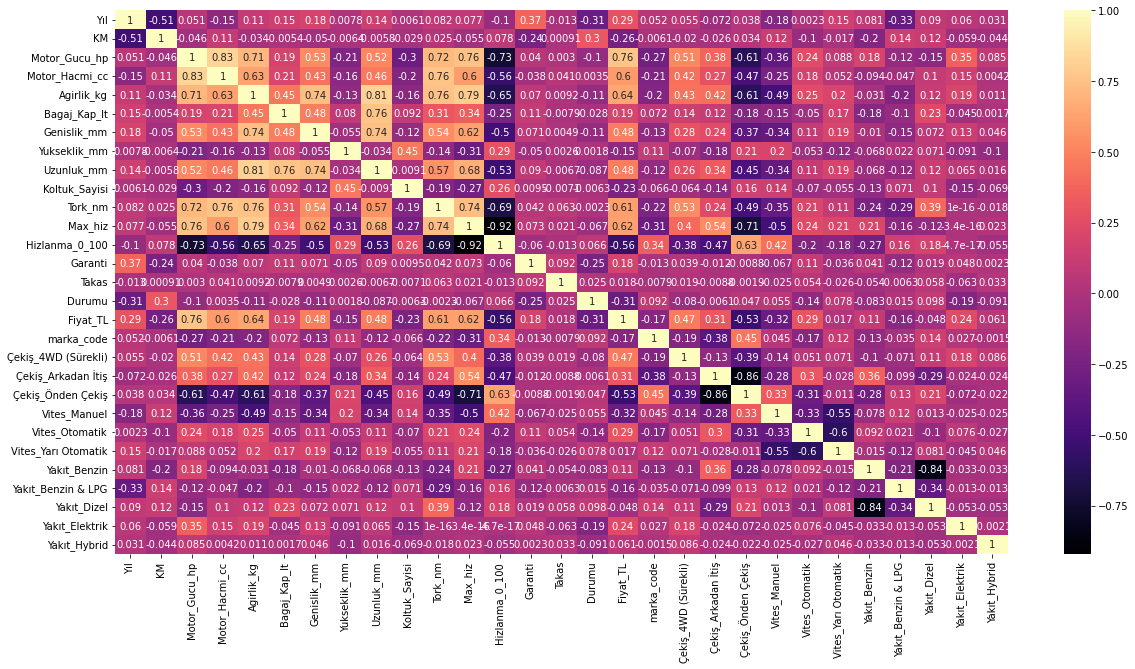

In [201]:
sb.heatmap(car_b.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

I will remove columns which has close to zero colleration with price

In [202]:
del car_b['Takas']
del car_b['Yakıt_Dizel']
del car_b['Yakıt_Hybrid']
del car_b['Vites_Yarı Otomatik']

In [203]:
car_b_train, car_b_test= train_test_split(car_b, train_size=0.67, test_size=0.33, random_state = 0)

y_train = car_b_train.loc[:,car_b_train.columns == 'Fiyat_TL']

x_train = car_b_train.loc[:, car_b_train.columns != 'Fiyat_TL']

y_test = car_b_test.loc[:,car_b_test.columns == 'Fiyat_TL']

x_test = car_b_test.loc[:,car_b_test.columns != 'Fiyat_TL']

In [204]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_linear=lin_reg.predict(x_test)
y_pred_linear=pd.DataFrame(y_pred_linear)

ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
y_pred_ridge=pd.DataFrame(y_pred_ridge)

lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso=pd.DataFrame(y_pred_lasso)

bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
y_pred_bay= bayesian.predict(x_test)
y_pred_bay=pd.DataFrame(y_pred_bay)

en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)
y_pred_en = en.predict(x_test)
y_pred_en=pd.DataFrame(y_pred_en)

C:\Users\umutd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
print('EXPLAINED VARIANCE SCORE:')
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of LINEAR REGRESSION model is {}'.format(evs(y_test,y_pred_linear)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of RIDGE REGRESSION model is {}'.format(evs(y_test,y_pred_ridge)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of LASSO REGRESSION model is {}'.format(evs(y_test,y_pred_lasso)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of BAYESSIAN REGRESSION model is {}'.format(evs(y_test,y_pred_bay)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of ELASTIC NET REGRESSION  is {}'.format(evs(y_test,y_pred_en)))


EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of LINEAR REGRESSION model is 0.7605911714060338
-------------------------------------------------------------------------------
Explained Variance Score of RIDGE REGRESSION model is 0.7619089669536103
-------------------------------------------------------------------------------
Explained Variance Score of LASSO REGRESSION model is 0.7605912643462993
-------------------------------------------------------------------------------
Explained Variance Score of BAYESSIAN REGRESSION model is 0.7182439002184564
-------------------------------------------------------------------------------
Explained Variance Score of ELASTIC NET REGRESSION  is 0.7602498568542797


In [206]:
print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LINEAR REGRESSION model is {}'.format(r2_score(y_test,y_pred_linear)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of RIDGE REGRESSION model is {}'.format(r2_score(y_test,y_pred_ridge)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LASSO REGRESSION model is {}'.format(r2_score(y_test,y_pred_lasso)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of BAYESSIAN REGRESSION model is {}'.format(r2_score(y_test,y_pred_bay)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of ELASTIC NET REGRESSION  is {}'.format(r2_score(y_test,y_pred_en)))

R-SQUARED:
-------------------------------------------------------------------------------
Explained R-squared of LINEAR REGRESSION model is 0.7605907881939389
-------------------------------------------------------------------------------
Explained R-squared of RIDGE REGRESSION model is 0.7619055748302632
-------------------------------------------------------------------------------
Explained R-squared of LASSO REGRESSION model is 0.7605908810773232
-------------------------------------------------------------------------------
Explained R-squared of BAYESSIAN REGRESSION model is 0.7178943539804297
-------------------------------------------------------------------------------
Explained R-squared of ELASTIC NET REGRESSION  is 0.7602351850759703


System success increase a little bit %75 to % 76 .

In [207]:
car_b

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Elektrik
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,1,144000,80,0,0,1,1,0,1,0,0
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,1,268500,38,0,0,1,0,0,0,1,0
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,137000,98,0,0,1,1,0,0,0,0
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,118000,34,0,0,1,1,0,0,0,0
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,1,195000,91,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,225750,67,0,0,1,0,1,0,0,0
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,229000,44,0,0,1,0,0,0,0,0
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,126500,72,0,0,1,1,0,0,0,0
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,173000,108,0,0,1,0,0,0,0,0


sample: ford focus 1.5 TDCi ST Line

In [208]:
samplecar={'Yıl':[2018], 'KM':[33.500],'Motor_Gucu_hp':[120], 'Motor_Hacmi_cc':[1500],'Agirlik_kg':[1398]
       ,'Bagaj_Kap_lt':[511],'Genislik_mm':[1848],'Yukseklik_mm':[1454],'Uzunluk_mm':[4647],
       'Koltuk_Sayisi':[5],'Tork_nm':[300],'Max_hiz':[196],'Hizlanma_0_100':[10],
      'Garanti':[1],'Durumu':[1],'marka_code':[34],'Çekiş_4WD (Sürekli)':[0],
      'Çekiş_Arkadan İtiş':[0],'Çekiş_Önden Çekiş':[1],'Vites_Manuel':[0],'Vites_Otomatik':[1],
      'Yakıt_Benzin':[0],'Yakıt_Benzin & LPG':[0],
      'Yakıt_Elektrik':[0]}

In [209]:
samplecar=pd.DataFrame(samplecar)

In [210]:
y_pred_linear=lin_reg.predict(samplecar)
y_pred_ridge = ridge.predict(samplecar)
y_pred_lasso = lasso.predict(samplecar)
y_pred_bay= bayesian.predict(samplecar)
y_pred_en = en.predict(samplecar)
print('LINEAR REGRESSION prediction for my car price',y_pred_linear)
print('RIDGE REGRESSION prediction for my car price',y_pred_ridge)
print('LASSO REGRESSION prediction for my car price',y_pred_lasso)
print('BAYESIAN REGRESSION prediction for my car price',y_pred_bay)
print('ELASTIC NET REGRESSION for my car price',y_pred_en)

LINEAR REGRESSION prediction for my car price [[328585.10975874]]
RIDGE REGRESSION prediction for my car price [[331682.64371692]]
LASSO REGRESSION prediction for my car price [328585.2185095]
BAYESIAN REGRESSION prediction for my car price [393714.59829021]
ELASTIC NET REGRESSION for my car price [338156.18998586]


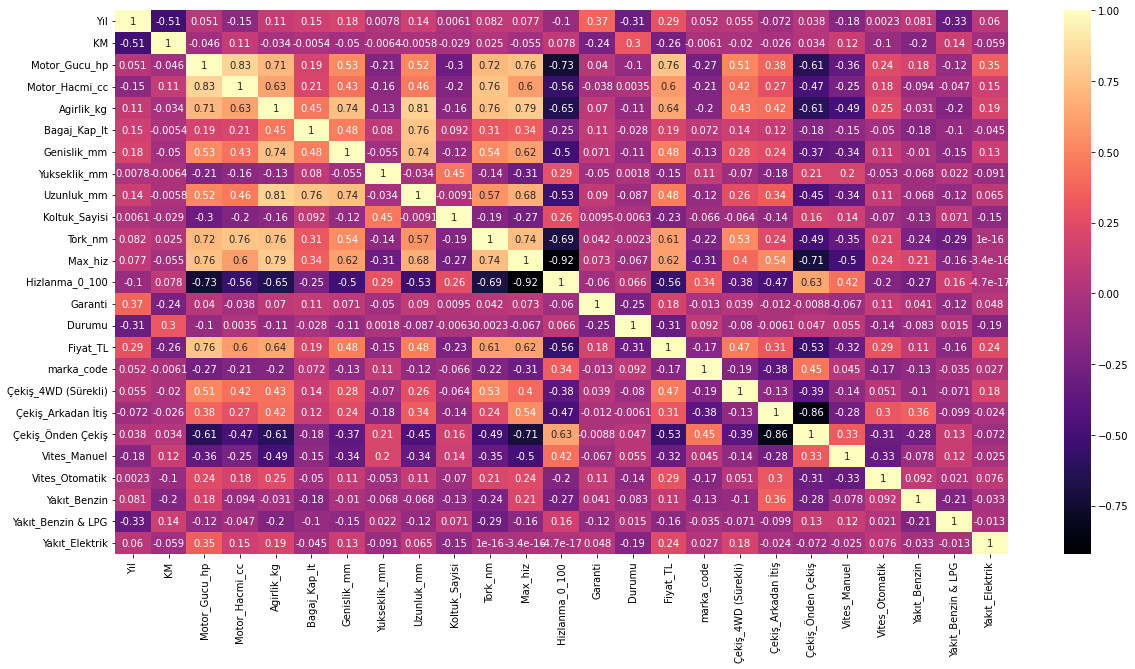

In [211]:
sb.heatmap(car_b.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

I will remove columns have low correlation with price 

I removed 'Yukseklik' and 'markacode' correlation.Imlemented same regression models.But I git less success.R2 and corr values decreased to %75

In [212]:
car_b

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Elektrik
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,1,144000,80,0,0,1,1,0,1,0,0
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,1,268500,38,0,0,1,0,0,0,1,0
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,137000,98,0,0,1,1,0,0,0,0
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,118000,34,0,0,1,1,0,0,0,0
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,1,195000,91,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,225750,67,0,0,1,0,1,0,0,0
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,229000,44,0,0,1,0,0,0,0,0
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,126500,72,0,0,1,1,0,0,0,0
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,173000,108,0,0,1,0,0,0,0,0


In [213]:
car_b_train, car_b_test= train_test_split(car_b, train_size=0.67, test_size=0.33, random_state = 0)


y_train = car_b_train.loc[:,car_b_train.columns == 'Fiyat_TL']

x_train = car_b_train.loc[:, car_b_train.columns == 'Motor_Gucu_hp']

y_test = car_b_test.loc[:,car_b_test.columns == 'Fiyat_TL']

x_test = car_b_test.loc[:,car_b_test.columns == 'Motor_Gucu_hp']

In [214]:
lin_reg = LinearRegression() 
  
lin_reg.fit(x_train, y_train) 

LinearRegression()

In [215]:
from sklearn.preprocessing import PolynomialFeatures

SECOND ORDER POLYNOMIAL REGRESSION

In [216]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x_train) 
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
y_pred_poly=lin2.predict(poly.fit_transform(x_test))

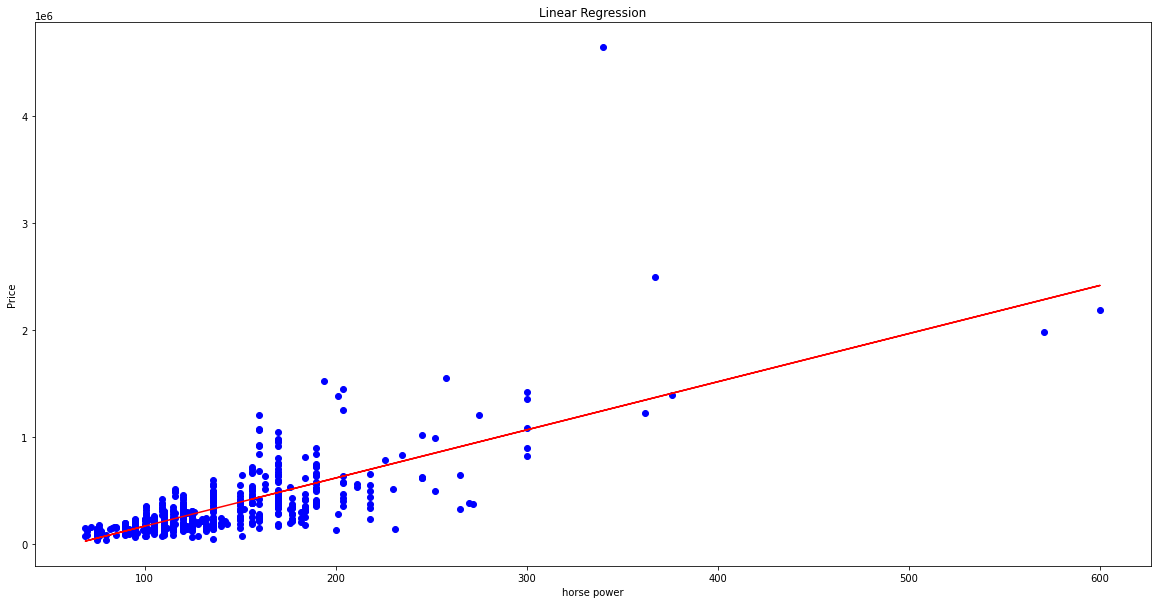

In [217]:
plt.scatter(x_train, y_train, color = 'blue') 
  
plt.plot(x_train, lin_reg.predict(x_train), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('horse power') 
plt.ylabel('Price') 
  
plt.show() 

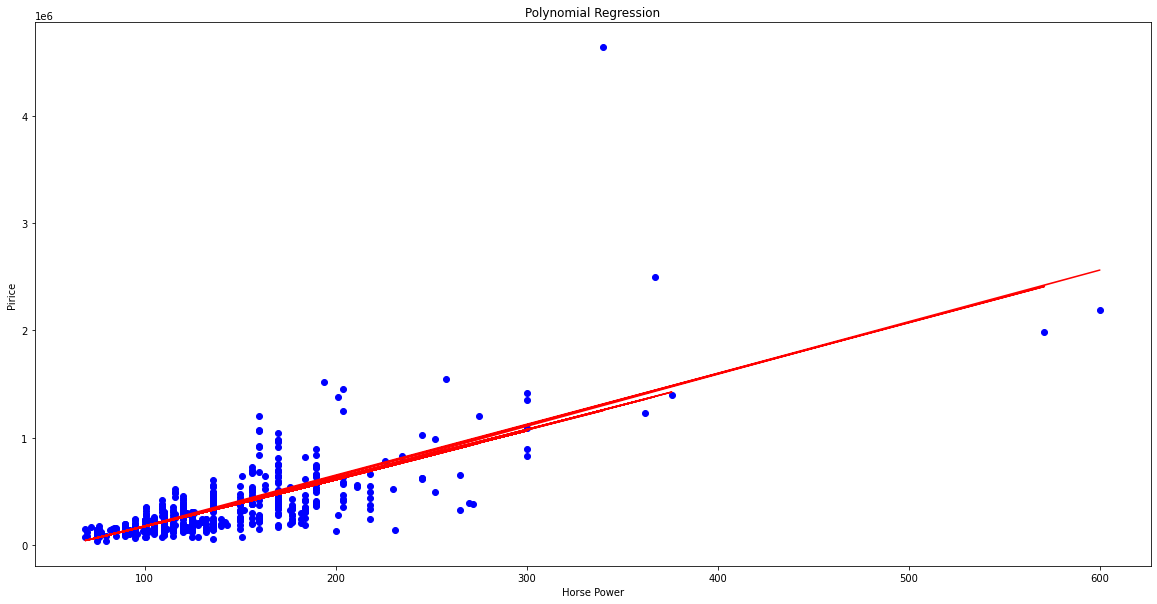

In [218]:
plt.scatter(x_train, y_train, color = 'blue') 
  
plt.plot(x_train, lin2.predict(poly.fit_transform(x_train)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Horse Power') 
plt.ylabel('Pirice') 
  
plt.show() 

In [219]:
mycar_hp={'Motor_Gucu_hp':[105]}

In [220]:
mycar_hp=pd.DataFrame(mycar_hp)

In [221]:
y_pred_lin=lin_reg.predict(x_test)

In [222]:
y_pred_lin=pd.DataFrame(y_pred_lin)

In [223]:
mycar_pred_price=lin_reg.predict(mycar_hp)

In [224]:
mycar_pred_price

array([[186343.3334919]])

In [225]:
lin2.predict(poly.fit_transform(mycar_hp)) 

array([[189786.35596216]])

In [226]:
print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LINEAR REGRESSION model is {}'.format(r2_score(y_test,y_pred_lin)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of 2nd ORDER POLYNOMIAL REGRESSION model is {}'.format(r2_score(y_test,y_pred_poly)))


R-SQUARED:
-------------------------------------------------------------------------------
Explained R-squared of LINEAR REGRESSION model is 0.6772670419254909
-------------------------------------------------------------------------------
Explained R-squared of 2nd ORDER POLYNOMIAL REGRESSION model is 0.6697802371261978


In [227]:
print('Explained Variance Score of LINEAR REGRESSION model is {}'.format(evs(y_test,y_pred_lin)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of POLYNOMIAL  is {}'.format(evs(y_test,y_pred_poly)))

Explained Variance Score of LINEAR REGRESSION model is 0.6783155778874507
-------------------------------------------------------------------------------
Explained Variance Score of POLYNOMIAL  is 0.6711759613642507


3rd ORDER POLLYNOMIAL REGRESSION 

In [228]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(x_train) 
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
y_pred_poly=lin2.predict(poly.fit_transform(x_test))

In [229]:
mycar_hp={'Motor_Gucu_hp':[105]}
mycar_hp=pd.DataFrame(mycar_hp)
y_pred_lin=lin_reg.predict(x_test)
y_pred_lin=pd.DataFrame(y_pred_lin)
mycar_pred_price=lin_reg.predict(mycar_hp)
lin2.predict(poly.fit_transform(mycar_hp)) 

array([[192732.82154034]])

In [230]:
print('Explained R-squared of 2nd ORDER POLYNOMIAL REGRESSION model is {}'.format(r2_score(y_test,y_pred_poly)))

Explained R-squared of 2nd ORDER POLYNOMIAL REGRESSION model is 0.616413146311998


When I increase degree of polynomial regression , R2 value decrease . So second order polynomial regression found more usefull solution

In [231]:
car_b

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Elektrik
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,1,144000,80,0,0,1,1,0,1,0,0
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,1,268500,38,0,0,1,0,0,0,1,0
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,137000,98,0,0,1,1,0,0,0,0
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,118000,34,0,0,1,1,0,0,0,0
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,1,195000,91,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,225750,67,0,0,1,0,1,0,0,0
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,229000,44,0,0,1,0,0,0,0,0
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,126500,72,0,0,1,1,0,0,0,0
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,173000,108,0,0,1,0,0,0,0,0


STEP FORWARD FEATURE SELECTION

In [232]:
!pip install mlxtend

In [233]:


from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [234]:
car_b

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100,Garanti,Durumu,Fiyat_TL,marka_code,Çekiş_4WD (Sürekli),Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Vites_Manuel,Vites_Otomatik,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Elektrik
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,1,144000,80,0,0,1,1,0,1,0,0
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514,1,1,268500,38,0,0,1,0,0,0,1,0
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000,1,1,137000,98,0,0,1,1,0,0,0,0
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000,0,1,118000,34,0,0,1,1,0,0,0,0
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000,0,1,195000,91,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000,1,1,225750,67,0,0,1,0,1,0,0,0
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000,0,1,229000,44,0,0,1,0,0,0,0,0
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000,1,1,126500,72,0,0,1,1,0,0,0,0
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000,0,1,173000,108,0,0,1,0,0,0,0,0


In [235]:
X=car_b.iloc[:,:13]

Forward Selection Method — SFS() from mlxtend

In [236]:
X

,Yıl,KM,Motor_Gucu_hp,Motor_Hacmi_cc,Agirlik_kg,Bagaj_Kap_lt,Genislik_mm,Yukseklik_mm,Uzunluk_mm,Koltuk_Sayisi,Tork_nm,Max_hiz,Hizlanma_0_100
0,2020,8000,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514
1,2020,7850,101,1301,1387.805281,463.395604,1805.650881,1456.987885,4559.427313,4.949946,257.552747,203.725469,10.307514
2,2015,260000,90,1364,1300.000000,452.000000,1775.000000,1465.000000,4620.000000,5.000000,205.000000,180.000000,12.500000
3,2010,252000,110,1560,1385.000000,526.000000,2019.000000,1500.000000,4337.000000,5.000000,240.000000,190.000000,11.100000
4,2013,87000,105,1598,1263.000000,590.000000,1814.000000,1461.000000,4659.000000,5.000000,250.000000,194.000000,10.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2016,95000,136,1598,1548.000000,500.000000,1856.000000,1498.000000,4842.000000,5.000000,320.000000,200.000000,10.900000
967,2015,21000,136,1582,1391.000000,378.000000,1780.000000,1470.000000,4300.000000,5.000000,300.000000,200.000000,10.600000
968,2018,99750,100,1560,1090.000000,640.000000,1748.000000,1466.000000,4445.000000,5.000000,254.000000,183.000000,10.800000
969,2016,44000,90,1422,1165.000000,280.000000,1682.000000,1453.000000,3972.000000,5.000000,230.000000,184.000000,10.900000


In [237]:
y=car_b['Fiyat_TL']

In [238]:
sfs=SFS(LinearRegression(),k_features=5,forward=True,floating=False,scoring='r2',cv=0)

In [239]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=5,
                          scoring='r2')

In [240]:
SFS_results=pd.DataFrame(sfs.subsets_).transpose()

In [241]:
SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)",[0.5846053743575436],0.584605,"(Motor_Gucu_hp,)"
2,"(0, 2)",[0.6456136093871839],0.645614,"(Yıl, Motor_Gucu_hp)"
3,"(0, 1, 2)",[0.6590788417730226],0.659079,"(Yıl, KM, Motor_Gucu_hp)"
4,"(0, 1, 2, 4)",[0.6741117237821307],0.674112,"(Yıl, KM, Motor_Gucu_hp, Agirlik_kg)"
5,"(0, 1, 2, 4, 12)",[0.6780735959962462],0.678074,"(Yıl, KM, Motor_Gucu_hp, Agirlik_kg, Hizlanma_..."


5 most important features are iteratively added to the subset in a step-wise manner based on R-squared scoring

In [242]:
mycar={'Yıl':[2015],'KM':[83000],'Motor_Gucu_hp':[105],'Agirlik_kg':[1134],'Hizlanma_0_100':[10]}

In [243]:
car1_train, car1_test= train_test_split(car_b, train_size=0.67, test_size=0.33, random_state = 0)

y_train = car1_train.loc[:,car1_train.columns == 'Fiyat_TL']

x_train = car1_train.loc[:, car1_train.columns != 'Fiyat_TL']

y_test = car1_test.loc[:,car1_test.columns == 'Fiyat_TL']

x_test = car1_test.loc[:,car1_test.columns != 'Fiyat_TL']

In [244]:
x_train=x_train.iloc[:,[0,1,2,4,12]]

In [245]:
x_test=x_test.iloc[:,[0,1,2,4,12]]

In [246]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [247]:
y_pred_linear=lin_reg.predict(x_test)

In [248]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,369292.280819
1,-29366.043809
2,576217.642218
3,66179.082901
4,239939.362251
...,...
316,373339.304623
317,182240.278084
318,414855.627182
319,973134.838225


In [249]:
mycar=pd.DataFrame(mycar)

In [250]:
mycar

,Yıl,KM,Motor_Gucu_hp,Agirlik_kg,Hizlanma_0_100
0,2015,83000,105,1134,10


In [251]:
y_pred_linear=lin_reg.predict(mycar)

In [252]:
mycar_hp=pd.DataFrame(mycar_hp)

In [253]:
mycar_pred_price=lin_reg.predict(mycar)

In [254]:
mycar_pred_price

array([[117539.07650009]])

In [255]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_linear=lin_reg.predict(x_test)
y_pred_linear=pd.DataFrame(y_pred_linear)

ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
y_pred_ridge=pd.DataFrame(y_pred_ridge)

lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso=pd.DataFrame(y_pred_lasso)

bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
y_pred_bay= bayesian.predict(x_test)
y_pred_bay=pd.DataFrame(y_pred_bay)

en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)
y_pred_en = en.predict(x_test)
y_pred_en=pd.DataFrame(y_pred_en)

C:\Users\umutd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [256]:
print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LINEAR REGRESSION model is {}'.format(r2_score(y_test,y_pred_linear)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of RIDGE REGRESSION model is {}'.format(r2_score(y_test,y_pred_ridge)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of LASSO REGRESSION model is {}'.format(r2_score(y_test,y_pred_lasso)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of BAYESSIAN REGRESSION model is {}'.format(r2_score(y_test,y_pred_bay)))
print('-------------------------------------------------------------------------------')
print('Explained R-squared of ELASTIC NET REGRESSION  is {}'.format(r2_score(y_test,y_pred_en)))

R-SQUARED:
-------------------------------------------------------------------------------
Explained R-squared of LINEAR REGRESSION model is 0.7205340672243716
-------------------------------------------------------------------------------
Explained R-squared of RIDGE REGRESSION model is 0.7205380856401619
-------------------------------------------------------------------------------
Explained R-squared of LASSO REGRESSION model is 0.7205340703844652
-------------------------------------------------------------------------------
Explained R-squared of BAYESSIAN REGRESSION model is 0.04869530961346824
-------------------------------------------------------------------------------
Explained R-squared of ELASTIC NET REGRESSION  is 0.7205600654868143


In [257]:
y_pred_linear=lin_reg.predict(mycar)
y_pred_ridge = ridge.predict(mycar)
y_pred_lasso = lasso.predict(mycar)
y_pred_bay= bayesian.predict(mycar)
y_pred_en = en.predict(mycar)

In [258]:
print('LINEAR REGRESSION prediction for my car price',y_pred_linear)
print('RIDGE REGRESSION prediction for my car price',y_pred_ridge)
print('LASSO REGRESSION prediction for my car price',y_pred_lasso)
print('ELASTIC NET REGRESSION for my car price',y_pred_en)

LINEAR REGRESSION prediction for my car price [[117539.07650009]]
RIDGE REGRESSION prediction for my car price [[117552.20157891]]
LASSO REGRESSION prediction for my car price [117539.08626036]
ELASTIC NET REGRESSION for my car price [117624.16856736]
